# QVAP

### Avaliando embalagens


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn import metrics


In [2]:


import json
import warnings
import sys
from platform import python_version


In [3]:

import pylab as pl
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [4]:
%config InlineBackend.figure_format = 'retina' #set 'png' on notebooks

pd.options.mode.chained_assignment = None
seed=101
np.random.seed(seed)

In [5]:
# Versões utilizadas
print('Python version is {}.'.format(python_version()))
print('Scikit-learn version is {}.'.format(sklearn.__version__))

Python version is 3.6.9.
Scikit-learn version is 0.21.2.


In [6]:
# Definindo a classe color para melhoria dos prints
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## Dados

In [7]:
#content = open('data/tasks.json').read()

#tasks = pd.DataFrame(json.loads(content))

tasks = pd.read_json('data/tasks.json')#, lines=True)

In [8]:
# Carregando o dataset eleições 2014
# Dados de treino
packagings = pd.read_csv('data/packagings.csv')

In [9]:
tasks.head()

,info,external_uid,user_id,task_id,created,finish_time,calibration,user_ip,timeout,project_id,id
0,{'url_second': 'https://drive.google.com/uc?ex...,NaN,NaN,70306,2019-08-21T00:28:23.491380,2019-08-21 00:32:04.850937,NaN,187.183.202.214,NaN,644,32220
1,{'url_second': 'https://drive.google.com/uc?ex...,NaN,NaN,70307,2019-08-21T00:32:05.021768,2019-08-21 00:32:30.468938,NaN,187.183.202.214,NaN,644,32221
2,{'url_second': 'https://drive.google.com/uc?ex...,NaN,NaN,70308,2019-08-21T00:32:30.631919,2019-08-21 00:32:40.130400,NaN,187.183.202.214,NaN,644,32222
3,{'url_second': 'https://drive.google.com/uc?ex...,NaN,NaN,70309,2019-08-21T00:32:40.274861,2019-08-21 00:32:48.542194,NaN,187.183.202.214,NaN,644,32223
4,{'url_second': 'https://drive.google.com/uc?ex...,NaN,NaN,70310,2019-08-21T00:32:48.718667,2019-08-21 00:32:54.215483,NaN,187.183.202.214,NaN,644,32224


In [10]:
packagings.head()

,id,URL,shape,material,surface,color,constitution
0,63,https://drive.google.com/uc?export=view&id=1hw...,Orgânica,Vidro,Fosca,Neutra,Ordem
1,62,https://drive.google.com/uc?export=view&id=1V6...,Orgânica,Vidro,Fosca,Neutra,Complexidade
2,61,https://drive.google.com/uc?export=view&id=1_2...,Orgânica,Vidro,Fosca,Intensa,Ordem
3,60,https://drive.google.com/uc?export=view&id=1vz...,Orgânica,Vidro,Fosca,Intensa,Complexidade
4,59,https://drive.google.com/uc?export=view&id=12X...,Orgânica,Vidro,Brilhosa,Neutra,Ordem


In [11]:
tasks['info']

0     {'url_second': 'https://drive.google.com/uc?ex...
1     {'url_second': 'https://drive.google.com/uc?ex...
2     {'url_second': 'https://drive.google.com/uc?ex...
3     {'url_second': 'https://drive.google.com/uc?ex...
4     {'url_second': 'https://drive.google.com/uc?ex...
5     {'url_second': 'https://drive.google.com/uc?ex...
6     {'url_second': 'https://drive.google.com/uc?ex...
7     {'url_second': 'https://drive.google.com/uc?ex...
8     {'url_second': 'https://drive.google.com/uc?ex...
9     {'url_second': 'https://drive.google.com/uc?ex...
10    {'url_second': 'https://drive.google.com/uc?ex...
11    {'url_second': 'https://drive.google.com/uc?ex...
12    {'url_second': 'https://drive.google.com/uc?ex...
13    {'url_second': 'https://drive.google.com/uc?ex...
14    {'url_second': 'https://drive.google.com/uc?ex...
15    {'url_second': 'https://drive.google.com/uc?ex...
16    {'url_second': 'https://drive.google.com/uc?ex...
17    {'url_second': 'https://drive.google.com/u

In [12]:
info=pd.io.json.json_normalize(tasks['info'])

In [13]:
info

,url_second,url_first,theLess,question,order,url_third,url_fourth,theMost,id,userProfile.city,userProfile.educ,userProfile.age,userProfile.background_02,userProfile.background_01,userProfile.state,userProfile.opinion,userProfile.sex,userProfile.email,userProfile.clas
0,https://drive.google.com/uc?export=view&id=1fX...,https://drive.google.com/uc?export=view&id=10J...,https://drive.google.com/uc?export=view&id=1B5...,Qual das embalagens abaixo lhe parece mais eco...,"0,7",https://drive.google.com/uc?export=view&id=14U...,https://drive.google.com/uc?export=view&id=1B5...,https://drive.google.com/uc?export=view&id=10J...,77,Campina Grande,superior completo,37,yes,yes,Paraíba,,M,socrateslg@gmail.com,media
1,https://drive.google.com/uc?export=view&id=1Ce...,https://drive.google.com/uc?export=view&id=172...,https://drive.google.com/uc?export=view&id=172...,Qual das embalagens abaixo lhe parece mais eco...,"0,8",https://drive.google.com/uc?export=view&id=12X...,https://drive.google.com/uc?export=view&id=1lx...,https://drive.google.com/uc?export=view&id=1lx...,96,Campina Grande,superior completo,37,yes,yes,Paraíba,,M,socrateslg@gmail.com,media
2,https://drive.google.com/uc?export=view&id=1Zs...,https://drive.google.com/uc?export=view&id=1Ko...,https://drive.google.com/uc?export=view&id=1wF...,Qual das embalagens abaixo lhe parece mais eco...,"0,9",https://drive.google.com/uc?export=view&id=1wF...,https://drive.google.com/uc?export=view&id=18B...,https://drive.google.com/uc?export=view&id=1Ko...,271,Campina Grande,superior completo,37,yes,yes,Paraíba,,M,socrateslg@gmail.com,media
3,https://drive.google.com/uc?export=view&id=1IZ...,https://drive.google.com/uc?export=view&id=1Rh...,https://drive.google.com/uc?export=view&id=172...,Qual das embalagens abaixo lhe parece mais eco...,"0,10",https://drive.google.com/uc?export=view&id=1eq...,https://drive.google.com/uc?export=view&id=172...,https://drive.google.com/uc?export=view&id=1IZ...,31,Campina Grande,superior completo,37,yes,yes,Paraíba,,M,socrateslg@gmail.com,media
4,https://drive.google.com/uc?export=view&id=1Ld...,https://drive.google.com/uc?export=view&id=18B...,https://drive.google.com/uc?export=view&id=1Ot...,Qual das embalagens abaixo lhe parece mais eco...,"0,11",https://drive.google.com/uc?export=view&id=1X2...,https://drive.google.com/uc?export=view&id=1Ot...,https://drive.google.com/uc?export=view&id=1X2...,3,Campina Grande,superior completo,37,yes,yes,Paraíba,,M,socrateslg@gmail.com,media
5,https://drive.google.com/uc?export=view&id=1Em...,https://drive.google.com/uc?export=view&id=1My...,https://drive.google.com/uc?export=view&id=1B5...,Qual das embalagens abaixo lhe parece mais eco...,"0,12",https://drive.google.com/uc?export=view&id=1gG...,https://drive.google.com/uc?export=view&id=1B5...,https://drive.google.com/uc?export=view&id=1Em...,171,Campina Grande,superior completo,37,yes,yes,Paraíba,,M,socrateslg@gmail.com,media
6,https://drive.google.com/uc?export=view&id=1DM...,https://drive.google.com/uc?export=view&id=1Ce...,https://drive.google.com/uc?export=view&id=1Rh...,Qual das embalagens abaixo lhe parece mais eco...,"0,13",https://drive.google.com/uc?export=view&id=1IZ...,https://drive.google.com/uc?export=view&id=1Rh...,https://drive.google.com/uc?export=view&id=1Ce...,340,Campina Grande,superior completo,37,yes,yes,Paraíba,,M,socrateslg@gmail.com,media
7,https://drive.google.com/uc?export=view&id=1gG...,https://drive.google.com/uc?export=view&id=1DM...,https://drive.google.com/uc?export=view&id=1gG...,Qual das embalagens abaixo lhe parece mais eco...,"0,14",https://drive.google.com/uc?export=view&id=1hw...,https://drive.google.com/uc?export=view&id=1fY...,https://drive.google.com/uc?export=view&id=1fY...,306,Campina Grande,superior completo,37,yes,yes,Paraíba,,M,socrateslg@gmail.com,media
8,https://drive.google.com/uc?export=view&id=1hw...,https://drive.google.com/uc?export=view&id=12X...,https://drive.google.com/uc?export=view&id=1AI...,Qual das embalagens abaixo l

In [14]:
tasks=tasks.join(info, rsuffix='_info')

In [15]:
tasks.head()

,info,external_uid,user_id,task_id,created,finish_time,calibration,user_ip,timeout,project_id,...,userProfile.city,userProfile.educ,userProfile.age,userProfile.background_02,userProfile.background_01,userProfile.state,userProfile.opinion,userProfile.sex,userProfile.email,userProfile.clas
0,{'url_second': 'https://drive.google.com/uc?ex...,NaN,NaN,70306,2019-08-21T00:28:23.491380,2019-08-21 00:32:04.850937,NaN,187.183.202.214,NaN,644,...,Campina Grande,superior completo,37,yes,yes,Paraíba,,M,socrateslg@gmail.com,media
1,{'url_second': 'https://drive.google.com/uc?ex...,NaN,NaN,70307,2019-08-21T00:32:05.021768,2019-08-21 00:32:30.468938,NaN,187.183.202.214,NaN,644,...,Campina Grande,superior completo,37,yes,yes,Paraíba,,M,socrateslg@gmail.com,media
2,{'url_second': 'https://drive.google.com/uc?ex...,NaN,NaN,70308,2019-08-21T00:32:30.631919,2019-08-21 00:32:40.130400,NaN,187.183.202.214,NaN,644,...,Campina Grande,superior completo,37,yes,yes,Paraíba,,M,socrateslg@gmail.com,media
3,{'url_second': 'https://drive.google.com/uc?ex...,NaN,NaN,70309,2019-08-21T00:32:40.274861,2019-08-21 00:32:48.542194,NaN,187.183.202.214,NaN,644,...,Campina Grande,superior completo,37,yes,yes,Paraíba,,M,socrateslg@gmail.com,media
4,{'url_second': 'https://drive.google.com/uc?ex...,NaN,NaN,70310,2019-08-21T00:32:48.718667,2019-08-21 00:32:54.215483,NaN,187.183.202.214,NaN,644,...,Campina Grande,superior completo,37,yes,yes,Paraíba,,M,socrateslg@gmail.com,media


In [16]:
#comparisons_1 = pd.DataFrame(data={'theMost': tasks['theMost'], 'theLess': tasks['theLess']})
#comparisons_2 = pd.DataFrame(data={'theMost': tasks['theMost'], 'theLess': [x['url_second'] if x['url_second'] != x['theMost'] else x['theMost'] for x in tasks]})

#comparisons_2 = tasks.loc[:, ['theMost', 'url_second']]
#comparisons_2 = comparisons_2[comparisons_2['theMost']!=comparisons_2['url_second']]
#comparisons_2.rename(columns={"url_second": "theLess"})
#comparisons_2['result']='TRUE'
#comparisons_2.reindex

def return_comparisons(tasks, theMost, theLess, result):
    comparisons = tasks.loc[:, [theMost, theLess]]
    comparisons = comparisons[comparisons[theMost]!=comparisons[theLess]]
    comparisons.columns = ["theMost", "theLess"]
    #comparisons.rename(columns={theMost: "theMost",theLess: "theLess"})
    comparisons['result']=result
    comparisons['task_id']=tasks['task_id']
    #comparisons.reset_index(inplace=True)
    return comparisons




In [17]:
def return_comparisons_2(tasks, theMost, theLess, result, task_test = None):
    
    if task_test is not None:
        #test = DataFrame({'url_first': [task_test], 'url_second': [task_test], 'url_third': [task_test], 'url_fourth': [task_test]})
        #if any(tasks.isin({'url_first': [task_test], 'url_second': [task_test], 'url_third': [task_test], 'url_fourth': [task_test]})):
        tasks_test = pd.DataFrame(data=[elem for index, elem in tasks.iterrows() if task_test in [elem['url_first'], elem['url_second'], elem['url_third'], elem['url_fourth']] ],columns=tasks.columns)
        #tasks_comparisons_aux = pd.concat([tasks_test,tasks])
        #tasks_comparisons = tasks_comparisons_aux.drop_duplicates(keep=False)
    else:
        tasks_test = pd.DataFrame(columns=tasks.columns)
        #tasks_comparisons = tasks.copy()
        #tasks_comparisons
    #if any(str(elem) in ['a','b'] for elem in df['column'].tolist()):
    
    comparisons_test = tasks_test.loc[:, [theMost, theLess, 'task_id']]
    comparisons_comparisons = tasks.loc[:, [theMost, theLess, 'task_id']]
    comparisons_comparisons = pd.concat([comparisons_test,comparisons_comparisons]).drop_duplicates(keep=False)
    comparisons_test = comparisons_test[comparisons_test[theMost]!=comparisons_test[theLess]]
    comparisons_comparisons = comparisons_comparisons[comparisons_comparisons[theMost]!=comparisons_comparisons[theLess]]
    comparisons_test.columns = ["theMost", "theLess", 'task_id']
    comparisons_comparisons.columns = ["theMost", "theLess", 'task_id']
    #comparisons.rename(columns={theMost: "theMost",theLess: "theLess"})
    comparisons_test['result']=result
    comparisons_comparisons['result']=result

    #if(tasks)
    #comparisons_comparisons = tasks_comparisons.loc[:, [theMost, theLess]]
    #comparisons_comparisons = comparisons_comparisons[comparisons_comparisons[theMost]!=comparisons_comparisons[theLess]]
    #comparisons_comparisons.columns = ["theMost", "theLess"]
    #comparisons_comparisons['result']=result
    #comparisons_comparisons['task_id']=tasks['task_id']
    
    #comparisons_test = tasks_test.loc[:, [theMost, theLess]]
    #comparisons_test = comparisons_test[comparisons_test[theMost]!=comparisons_test[theLess]]
    #comparisons_test.columns = ["theMost", "theLess"]
    #comparisons_test['result']=result
    #comparisons_test['task_id']=tasks['task_id']
    return (comparisons_comparisons, comparisons_test)

In [18]:

def set_attributes(data,uRL_name):
    aux_packagings = packagings.copy()
    aux_packagings.columns = aux_packagings.columns.str.cat(["_"+uRL_name if x != 'id' and x != 'URL' else "" for x in aux_packagings.columns], sep ="")
    result = aux_packagings.set_index('URL').join(data.set_index(uRL_name), how='inner', lsuffix='_'+uRL_name)
    return result

In [527]:

def set_attributes_2(data,uRL_name,multiple_idx=False):
    index = data.sort_values(by=[uRL_name]).index
    aux_packagings = packagings.copy()
    aux_packagings.columns = aux_packagings.columns.str.cat(["_"+uRL_name if x != 'id' and x != 'URL' else "" for x in aux_packagings.columns], sep ="")
    result = aux_packagings.set_index('URL',drop=True).join(data.sort_values(by=[uRL_name]).set_index(uRL_name,drop=True), how='right', lsuffix='_'+uRL_name)
    if(multiple_idx):
        index = pd.MultiIndex.from_frame(pd.DataFrame(data={index.name: index, uRL_name: result.index}))#, names=['URL', uRL_name])
        return result.set_index(index)
    else:
        result[uRL_name] = result.index
        #index = pd.MultiIndex.from_frame(pd.DataFrame(data={uRL_name: result.index}), names=[uRL_name])#, names=['URL', uRL_name])
        #result.set_index(uRL_name)
        return result.set_index(uRL_name)#.drop([uRL_name], axis=1)

In [19]:

packagings.columns.str.cat(["_theMost" if x != 'id' and x != 'URL' else "" for x in packagings.columns], sep ="")

Index(['id', 'URL', 'shape_theMost', 'material_theMost', 'surface_theMost',
       'color_theMost', 'constitution_theMost'],
      dtype='object')

In [166]:
packagin_index = 11#aleatório
packaging_column = 'url_first'#aleatório

comparisons_1, tests_1 = return_comparisons_2(tasks, 'theMost', 'url_first', True, tasks.loc[packagin_index].at[packaging_column])
comparisons_2, tests_2 = return_comparisons_2(tasks, 'theMost', 'url_second', True, tasks.loc[packagin_index].at[packaging_column])
comparisons_3, tests_3 = return_comparisons_2(tasks, 'theMost', 'url_third', True, tasks.loc[packagin_index].at[packaging_column])
comparisons_4, tests_4 = return_comparisons_2(tasks, 'theMost', 'url_fourth', True, tasks.loc[packagin_index].at[packaging_column])

comparisons_5, tests_5 = return_comparisons_2(tasks, 'theLess', 'url_first', False, tasks.loc[packagin_index].at[packaging_column])
comparisons_6, tests_6 = return_comparisons_2(tasks, 'theLess', 'url_second', False, tasks.loc[packagin_index].at[packaging_column])
comparisons_7, tests_7 = return_comparisons_2(tasks, 'theLess', 'url_third', False, tasks.loc[packagin_index].at[packaging_column])
comparisons_8, tests_8 = return_comparisons_2(tasks, 'theLess', 'url_fourth', False, tasks.loc[packagin_index].at[packaging_column])

comparisons_aux = [comparisons_1, comparisons_2, comparisons_3, comparisons_4, comparisons_5, comparisons_6, comparisons_7, comparisons_8]
tests_aux = [tests_1, tests_2, tests_3, tests_4, tests_5, tests_6, tests_7, tests_8]

comparisons_train = pd.concat(comparisons_aux,sort=False,ignore_index=True)
comparisons_tests = pd.concat(tests_aux,sort=False,ignore_index=True)
comparisons_train.reset_index(drop=True,inplace=True)
comparisons_tests.reset_index(drop=True,inplace=True)

comparisons_train
#a,b = return_comparisons_2(tasks, 'theLess', 'url_fourth', False, tasks.loc[11].at['url_first'] )

#print(len(a),len(b))
#print(tasks['url_first'].loc[:0])
#for index, elem in tasks.copy().iterrows():
#    print(tasks.loc[tasks == elem])

#tasks_test = [elem for elem in tasks if tasks[:1] in [elem[:,['url_first']]] ]

#comparisons

,theMost,theLess,task_id,result
0,https://drive.google.com/uc?export=view&id=1lx...,https://drive.google.com/uc?export=view&id=172...,70307,True
1,https://drive.google.com/uc?export=view&id=1IZ...,https://drive.google.com/uc?export=view&id=1Rh...,70309,True
2,https://drive.google.com/uc?export=view&id=1Em...,https://drive.google.com/uc?export=view&id=1My...,70311,True
3,https://drive.google.com/uc?export=view&id=1fY...,https://drive.google.com/uc?export=view&id=1DM...,70313,True
4,https://drive.google.com/uc?export=view&id=1Hx...,https://drive.google.com/uc?export=view&id=1AI...,70315,True
5,https://drive.google.com/uc?export=view&id=1R8...,https://drive.google.com/uc?export=view&id=1pQ...,70318,True
6,https://drive.google.com/uc?export=view&id=1DE...,https://drive.google.com/uc?export=view&id=16C...,70289,True
7,https://drive.google.com/uc?export=view&id=11N...,https://drive.google.com/uc?export=view&id=1eq...,70290,True
8,https://drive.google.com/uc?export=view&id=1Ko...,https://drive.google.com/uc?export=view&id=19W...,70291,True
9,https://drive.google.com/uc?export=view&id=1r6...,https://drive.google.com/uc?export=view&id=1KW...,70293,True


In [528]:
comparisons_train_ready = set_attributes_2(comparisons_train,"theMost",False)
comparisons_train_ready = set_attributes_2(comparisons_train_ready,"theLess",True)
comparisons_train_ready
#packagings
#len(comparisons)
#len(pd.concat([comparisons_tests,comparisons_train]).drop_duplicates(keep=False))

,,id_theLess,shape_theLess,material_theLess,surface_theLess,color_theLess,constitution_theLess,id,shape_theMost,material_theMost,surface_theMost,color_theMost,constitution_theMost,task_id,result
theMost,theLess,,,,,,,,,,,,,,
https://drive.google.com/uc?export=view&id=1B5tlzA_VIuYKSeDugKnMG3K8ck_3WEdA,https://drive.google.com/uc?export=view&id=10Jz41XbCkiTT3Qnlsyf-Mn-5WZ9phuuR,6,Geométrica,Metal,Fosca,Neutra,Complexidade,25,Geométrica,Vidro,Brilhosa,Intensa,Ordem,70306,False
https://drive.google.com/uc?export=view&id=1AIPKMMAjqjvvraJZM7hYWuiaoAD02TTZ,https://drive.google.com/uc?export=view&id=10Jz41XbCkiTT3Qnlsyf-Mn-5WZ9phuuR,6,Geométrica,Metal,Fosca,Neutra,Complexidade,57,Orgânica,Vidro,Brilhosa,Intensa,Ordem,70267,False
https://drive.google.com/uc?export=view&id=1EEoy5MeYhOUKHledvLYolZ2rEGj2XLw_,https://drive.google.com/uc?export=view&id=11385E4pE6y8CTh51avtMZuASvaGQZcKM,28,Geométrica,Vidro,Fosca,Intensa,Complexidade,55,Orgânica,Polímero,Fosca,Neutra,Ordem,70298,True
https://drive.google.com/uc?export=view&id=1AIPKMMAjqjvvraJZM7hYWuiaoAD02TTZ,https://drive.google.com/uc?export=view&id=11385E4pE6y8CTh51avtMZuASvaGQZcKM,28,Geométrica,Vidro,Fosca,Intensa,Complexidade,57,Orgânica,Vidro,Brilhosa,Intensa,Ordem,70315,False
https://drive.google.com/uc?export=view&id=1HxIdENINkoIAYH-c0Ib-o3J8UYxqXXyh,https://drive.google.com/uc?export=view&id=11385E4pE6y8CTh51avtMZuASvaGQZcKM,28,Geométrica,Vidro,Fosca,Intensa,Complexidade,38,Orgânica,Metal,Fosca,Neutra,Complexidade,70315,True
https://drive.google.com/uc?export=view&id=1R8-9KsjicDUkIrtRJFXGEe3Qv_ialbbd,https://drive.google.com/uc?export=view&id=11385E4pE6y8CTh51avtMZuASvaGQZcKM,28,Geométrica,Vidro,Fosca,Intensa,Complexidade,43,Orgânica,Papel Cartão,Brilhosa,Neutra,Ordem,70266,True
https://drive.google.com/uc?export=view&id=1hwIG7voqAtG8Kpt3ntnhrPeZqjksG0ho,https://drive.google.com/uc?export=view&id=11385E4pE6y8CTh51avtMZuASvaGQZcKM,28,Geométrica,Vidro,Fosca,Intensa,Complexidade,63,Orgânica,Vidro,Fosca,Neutra,Ordem,70301,True
https://drive.google.com/uc?export=view&id=1eqrVbhU-1rStMP0qpsL7aulRcuIRaayp,https://drive.google.com/uc?export=view&id=11NpVDThNB92GWswYuKx7rlr1O1jD4UBa,42,Orgânica,Papel Cartão,Brilhosa,Neutra,Complexidade,33,Orgânica,Metal,Brilhosa,Intensa,Ordem,70290,False
https://drive.google.com/uc?export=view&id=13tAw6SGyLpVb1vAoxduCwxrfKu2yibwJ,https://drive.google.com/uc?export=view&id=11NpVDThNB92GWswYuKx7rlr1O1jD4UBa,42,Orgânica,Papel Cartão,Brilhosa,Neutra,Complexidade,16,Geométrica,Polímero,Brilhosa,Intensa,Complexidade,70305,False


In [529]:
comparisons_train.head()

,theMost,theLess,task_id,result
0,https://drive.google.com/uc?export=view&id=1lx...,https://drive.google.com/uc?export=view&id=172...,70307,True
1,https://drive.google.com/uc?export=view&id=1IZ...,https://drive.google.com/uc?export=view&id=1Rh...,70309,True
2,https://drive.google.com/uc?export=view&id=1Em...,https://drive.google.com/uc?export=view&id=1My...,70311,True
3,https://drive.google.com/uc?export=view&id=1fY...,https://drive.google.com/uc?export=view&id=1DM...,70313,True
4,https://drive.google.com/uc?export=view&id=1Hx...,https://drive.google.com/uc?export=view&id=1AI...,70315,True


In [530]:
packagings.loc[packagings['URL'] == 'https://drive.google.com/uc?export=view&id=12Xt1FjGTRXeL3p0Lq6yPA505H2ZSuFM4']

,id,URL,shape,material,surface,color,constitution
4,59,https://drive.google.com/uc?export=view&id=12X...,Orgânica,Vidro,Brilhosa,Neutra,Ordem


In [531]:
comparisons_tests_ready = set_attributes_2(comparisons_tests,"theMost",False)
comparisons_tests_ready = set_attributes_2(comparisons_tests_ready,"theLess", True)
comparisons_tests_ready

,,id_theLess,shape_theLess,material_theLess,surface_theLess,color_theLess,constitution_theLess,id,shape_theMost,material_theMost,surface_theMost,color_theMost,constitution_theMost,task_id,result
theMost,theLess,,,,,,,,,,,,,,
https://drive.google.com/uc?export=view&id=1RQpLGRE6eq_jwPePnRe9ANi3Qqk_kXAj,https://drive.google.com/uc?export=view&id=12Xt1FjGTRXeL3p0Lq6yPA505H2ZSuFM4,59,Orgânica,Vidro,Brilhosa,Neutra,Ordem,14,Geométrica,Papel Cartão,Fosca,Neutra,Complexidade,70288,True
https://drive.google.com/uc?export=view&id=1LdeS-2djkNqtanjlJBVa4DKslpufq686,https://drive.google.com/uc?export=view&id=12Xt1FjGTRXeL3p0Lq6yPA505H2ZSuFM4,59,Orgânica,Vidro,Brilhosa,Neutra,Ordem,39,Orgânica,Metal,Fosca,Neutra,Ordem,70288,False
https://drive.google.com/uc?export=view&id=1fYwhU8Om7S1UUdbNGqZG57ZMBw8dUYfq,https://drive.google.com/uc?export=view&id=13tAw6SGyLpVb1vAoxduCwxrfKu2yibwJ,16,Geométrica,Polímero,Brilhosa,Intensa,Complexidade,31,Geométrica,Vidro,Fosca,Neutra,Ordem,70286,True
https://drive.google.com/uc?export=view&id=13tAw6SGyLpVb1vAoxduCwxrfKu2yibwJ,https://drive.google.com/uc?export=view&id=14UQ8tJzAvLGTNP0KiJrEbsuQTxAJcuvn,48,Orgânica,Polímero,Brilhosa,Intensa,Complexidade,16,Geométrica,Polímero,Brilhosa,Intensa,Complexidade,70286,False
https://drive.google.com/uc?export=view&id=1fYwhU8Om7S1UUdbNGqZG57ZMBw8dUYfq,https://drive.google.com/uc?export=view&id=14UQ8tJzAvLGTNP0KiJrEbsuQTxAJcuvn,48,Orgânica,Polímero,Brilhosa,Intensa,Complexidade,31,Geométrica,Vidro,Fosca,Neutra,Ordem,70286,True
https://drive.google.com/uc?export=view&id=1X2IT3aVZJrvGrSwZ5u0D4D8f3d44s_BH,https://drive.google.com/uc?export=view&id=18BVQ5i2pYlYG3dUk2a0vIg7BuLSZ1gzy,0,Geométrica,Metal,Brilhosa,Intensa,Complexidade,3,Geométrica,Metal,Brilhosa,Neutra,Ordem,70310,True
https://drive.google.com/uc?export=view&id=1LdeS-2djkNqtanjlJBVa4DKslpufq686,https://drive.google.com/uc?export=view&id=18BVQ5i2pYlYG3dUk2a0vIg7BuLSZ1gzy,0,Geométrica,Metal,Brilhosa,Intensa,Complexidade,39,Orgânica,Metal,Fosca,Neutra,Ordem,70269,True
https://drive.google.com/uc?export=view&id=1OtIfyN6KmJR7bwI_ZlNxx6U6SlQB2vvZ,https://drive.google.com/uc?export=view&id=18BVQ5i2pYlYG3dUk2a0vIg7BuLSZ1gzy,0,Geométrica,Metal,Brilhosa,Intensa,Complexidade,9,Geométrica,Papel Cartão,Brilhosa,Intensa,Ordem,70310,False
https://drive.google.com/uc?export=view&id=1mfLQhjYr3TAH9M7VMSu686AolMETp9qB,https://drive.google.com/uc?export=view&id=19Wknw7VwM0X0QD1wgcvhznvFDZfWHCtv,54,Orgânica,Polímero,Fosca,Neutra,Complexidade,24,Geométrica,Vidro,Brilhosa,Intensa,Complexidade,70300,False


In [532]:

firsts = pd.DataFrame(data={'URL': tasks['url_first'], 'score': 0.0, 'occurrences' : 0})
seconds = pd.DataFrame(data={'URL': tasks['url_second'], 'score': 0.0, 'occurrences' : 0})
thirds = pd.DataFrame(data={'URL': tasks['url_third'], 'score': 0.0, 'occurrences' : 0})
fourths = pd.DataFrame(data={'URL': tasks['url_fourth'], 'score': 0.0, 'occurrences' : 0})

scores_aux = [firsts, seconds, thirds, fourths]
scores = pd.concat(scores_aux,sort=False)
#scores.reset_index(drop=True,inplace=True)

scores.sort_values("URL", inplace = True) 
scores_2 = scores.copy()
scores.drop_duplicates(subset ="URL", 
                     inplace = True) 
#for index_scores, row_scores in scores.iterrows():
#    print(scores_2[scores_2['URL']==row_scores['URL']])

scores.reset_index(drop=True,inplace=True)
scores.reindex(['URL'])
scores

,URL,score,occurrences
0,https://drive.google.com/uc?export=view&id=10J...,0.0,0
1,https://drive.google.com/uc?export=view&id=113...,0.0,0
2,https://drive.google.com/uc?export=view&id=11N...,0.0,0
3,https://drive.google.com/uc?export=view&id=125...,0.0,0
4,https://drive.google.com/uc?export=view&id=12X...,0.0,0
5,https://drive.google.com/uc?export=view&id=13t...,0.0,0
6,https://drive.google.com/uc?export=view&id=142...,0.0,0
7,https://drive.google.com/uc?export=view&id=14U...,0.0,0
8,https://drive.google.com/uc?export=view&id=16C...,0.0,0
9,https://drive.google.com/uc?export=view&id=172...,0.0,0


In [533]:

#scores[:1]
#scores.loc[scores['URL'] == some_value]

results = tasks.loc[:, ['theMost', 'url_first','url_second','url_third','url_fourth','theLess']]

#scores['score'] = [scores['score']+1 if scores['score'] == x['theMost'] and scores['score'] in [x['url_first'],x['url_second'],x['url_third'],x['url_fourth']] else scores['score'] for x in results]

#for index_results, row_results in results.iterrows():
#    scores.loc[scores['URL'] == row_results['theMost']]
        
count = 0
for index_results, row_results in results.iterrows():
    for index_scores, row_scores in scores.iterrows():
        #print('novo')
        #print(row_results['url_first'])
        if row_results['theMost'] == row_scores['URL']:
            #print('theMost')
            row_scores['score'] = row_scores['score'] + 2         
            #print(scores[index_scores:index_scores+1]['score'])
        if row_results['url_first'] == row_scores['URL']:
            #print('url_first')
            count = count + 1
            row_scores['occurrences'] = row_scores['occurrences'] + 1
            row_scores['score'] = row_scores['score'] + 1 
            #print(scores[index_scores:index_scores+1]['score'])
        if row_results['url_second'] == row_scores['URL']:
            #print('url_second')
            count = count + 1
            row_scores['occurrences'] = row_scores['occurrences'] + 1
            row_scores['score'] = row_scores['score'] + 1    
            #print(scores[index_scores:index_scores+1]['score'])
        if row_results['url_third'] == row_scores['URL']:
            #print('url_third')
            count = count + 1
            row_scores['occurrences'] = row_scores['occurrences'] + 1
            row_scores['score'] = row_scores['score'] + 1     
            #print(scores[index_scores:index_scores+1]['score'])
        if row_results['url_fourth'] == row_scores['URL']:
            #print('url_fourth')
            count = count + 1
            row_scores['occurrences'] = row_scores['occurrences'] + 1
            row_scores['score'] = row_scores['score'] + 1    
            #print(scores[index_scores:index_scores+1]['score'])
        if row_results['theLess'] == row_scores['URL']:
            #print('theLess')
            row_scores['score'] = row_scores['score'] - 1    
            #print(scores[index_scores:index_scores+1]['score'])
        scores[index_scores:index_scores+1]['score'] = row_scores['score']
        scores[index_scores:index_scores+1]['occurrences'] = row_scores['occurrences']
    
#print(count)
scores
#comparisons_2 = comparisons_2[comparisons_2['theMost']!=comparisons_2['url_second']]
#comparisons_2.rename(columns={"url_second": "theLess"})
#comparisons_2['result']='TRUE'
#comparisons_2.reindex

,URL,score,occurrences
0,https://drive.google.com/uc?export=view&id=10J...,6.0,2
1,https://drive.google.com/uc?export=view&id=113...,1.0,4
2,https://drive.google.com/uc?export=view&id=11N...,6.0,2
3,https://drive.google.com/uc?export=view&id=125...,4.0,4
4,https://drive.google.com/uc?export=view&id=12X...,5.0,3
5,https://drive.google.com/uc?export=view&id=13t...,0.0,2
6,https://drive.google.com/uc?export=view&id=142...,1.0,1
7,https://drive.google.com/uc?export=view&id=14U...,5.0,5
8,https://drive.google.com/uc?export=view&id=16C...,3.0,3
9,https://drive.google.com/uc?export=view&id=172...,0.0,2


In [534]:
scores_ready = set_attributes(scores,"URL")
scores_ready=scores_ready.fillna(0)

In [535]:
scores_ready

,id,shape_URL,material_URL,surface_URL,color_URL,constitution_URL,score,occurrences
URL,,,,,,,,
https://drive.google.com/uc?export=view&id=1hwIG7voqAtG8Kpt3ntnhrPeZqjksG0ho,63,Orgânica,Vidro,Fosca,Neutra,Ordem,6.0,4
https://drive.google.com/uc?export=view&id=1V6Ll04rBT6lSAVGdnXPEZpYZ1mMFqhvi,62,Orgânica,Vidro,Fosca,Neutra,Complexidade,4.0,3
https://drive.google.com/uc?export=view&id=1_2if1BxHQvLhvXGcU7qPxtlr8_xKAM02,61,Orgânica,Vidro,Fosca,Intensa,Ordem,4.0,2
https://drive.google.com/uc?export=view&id=1vzX7cDR4FzfTWoMQ_nuU6Fgdm7JNTcFb,60,Orgânica,Vidro,Fosca,Intensa,Complexidade,1.0,1
https://drive.google.com/uc?export=view&id=12Xt1FjGTRXeL3p0Lq6yPA505H2ZSuFM4,59,Orgânica,Vidro,Brilhosa,Neutra,Ordem,5.0,3
https://drive.google.com/uc?export=view&id=1im4nu1mLLAfHcwosuFwAHFm3SrYG6RpK,58,Orgânica,Vidro,Brilhosa,Neutra,Complexidade,5.0,4
https://drive.google.com/uc?export=view&id=1AIPKMMAjqjvvraJZM7hYWuiaoAD02TTZ,57,Orgânica,Vidro,Brilhosa,Intensa,Ordem,1.0,4
https://drive.google.com/uc?export=view&id=18D-a2wgiQxg2blRghVploCq-_0-fsLrm,56,Orgânica,Vidro,Brilhosa,Intensa,Complexidade,0.0,2
https://drive.google.com/uc?export=view&id=1EEoy5MeYhOUKHledvLYolZ2rEGj2XLw_,55,Orgânica,Polímero,Fosca,Neutra,Ordem,9.0,3


In [536]:
#meu
# Removendo os atributos desnecessário
#tasks = tasks.drop(['info','external_uid','user_id','finish_time', 'calibration', 'user_ip', 'timeout', 'project_id', 'id', 'question'], axis=1)
scores_cleaned = scores_ready.drop(['id'], axis=1)
#scores_cleaned['real_score'] = 0.0
#scores_cleaned.loc[scores_cleaned['occurrences'] > 0.0,['real_score']] = scores_cleaned['score'].divide(scores_cleaned['occurrences'], fill_value=0.0) 
#separando opiniões
opinions = tasks['userProfile.opinion']
opinions = opinions.loc[opinions != '']
#removendo atributos que não farão parte do modelo, mas que não não totalmente desnecessário
#tasks_cleaned = tasks.drop(['task_id','created','order','id_info', 'userProfile.city', 'userProfile.educ', 'userProfile.age', 'userProfile.background_02', 'userProfile.background_01', 'userProfile.state', 'userProfile.opinion', 'userProfile.sex', 'userProfile.email', 'userProfile.clas'], axis=1)
comparisons_train_cleaned = comparisons_train_ready.drop(['task_id','id_theLess','id'], axis=1)
comparisons_tests_cleaned = comparisons_tests_ready.drop(['task_id','id_theLess','id'], axis=1)


In [537]:
opinions.head()

20    As cores suaves, tons azulados e formatos mode...
41    As embalagens com uma quantidade menor de imag...
Name: userProfile.opinion, dtype: object

In [538]:
scores_cleaned

,shape_URL,material_URL,surface_URL,color_URL,constitution_URL,score,occurrences
URL,,,,,,,
https://drive.google.com/uc?export=view&id=1hwIG7voqAtG8Kpt3ntnhrPeZqjksG0ho,Orgânica,Vidro,Fosca,Neutra,Ordem,6.0,4
https://drive.google.com/uc?export=view&id=1V6Ll04rBT6lSAVGdnXPEZpYZ1mMFqhvi,Orgânica,Vidro,Fosca,Neutra,Complexidade,4.0,3
https://drive.google.com/uc?export=view&id=1_2if1BxHQvLhvXGcU7qPxtlr8_xKAM02,Orgânica,Vidro,Fosca,Intensa,Ordem,4.0,2
https://drive.google.com/uc?export=view&id=1vzX7cDR4FzfTWoMQ_nuU6Fgdm7JNTcFb,Orgânica,Vidro,Fosca,Intensa,Complexidade,1.0,1
https://drive.google.com/uc?export=view&id=12Xt1FjGTRXeL3p0Lq6yPA505H2ZSuFM4,Orgânica,Vidro,Brilhosa,Neutra,Ordem,5.0,3
https://drive.google.com/uc?export=view&id=1im4nu1mLLAfHcwosuFwAHFm3SrYG6RpK,Orgânica,Vidro,Brilhosa,Neutra,Complexidade,5.0,4
https://drive.google.com/uc?export=view&id=1AIPKMMAjqjvvraJZM7hYWuiaoAD02TTZ,Orgânica,Vidro,Brilhosa,Intensa,Ordem,1.0,4
https://drive.google.com/uc?export=view&id=18D-a2wgiQxg2blRghVploCq-_0-fsLrm,Orgânica,Vidro,Brilhosa,Intensa,Complexidade,0.0,2
https://drive.google.com/uc?export=view&id=1EEoy5MeYhOUKHledvLYolZ2rEGj2XLw_,Orgânica,Polímero,Fosca,Neutra,Ordem,9.0,3


### Análise exploratória dos dados

In [539]:
scores_ready.count()

id                  60
shape_URL           60
material_URL        60
surface_URL         60
color_URL           60
constitution_URL    60
score               60
occurrences         60
dtype: int64

In [540]:
# Decrevendo as variáveis numéricas
#desc_int = train.describe(include=[np.number])
#desc_int.loc['count'] = desc_int.loc['count'].astype(int).astype(str)
#desc_int.iloc[1:] = desc_int.iloc[1:].applymap('{:.0f}'.format)
#desc_int.T

#meu
# Decrevendo as variáveis numéricas
described_scores = scores_cleaned.describe(include=[np.number])
described_scores.loc['count'] = described_scores.loc['count'].astype(int).astype(str)
described_scores.iloc[1:] = described_scores.iloc[1:].applymap('{:.0f}'.format)
described_scores.T

,count,mean,std,min,25%,50%,75%,max
score,60,4,3,0,1,3,5,10
occurrences,60,3,1,1,2,2,4,6


Número de instâncias de cada classe da variável alvo
 12
  8
  7
  7
  6
  6
  6
  6
  1
  1
Embalagem(ns) vencedora(s) como mais sustentável(is)
                                                   shape_URL material_URL surface_URL color_URL constitution_URL  score  occurrences
URL                                                                                                                                 
https://drive.google.com/uc?export=view&id=19Wk...  Orgânica     Polímero       Fosca    Neutra     Complexidade   10.0            4


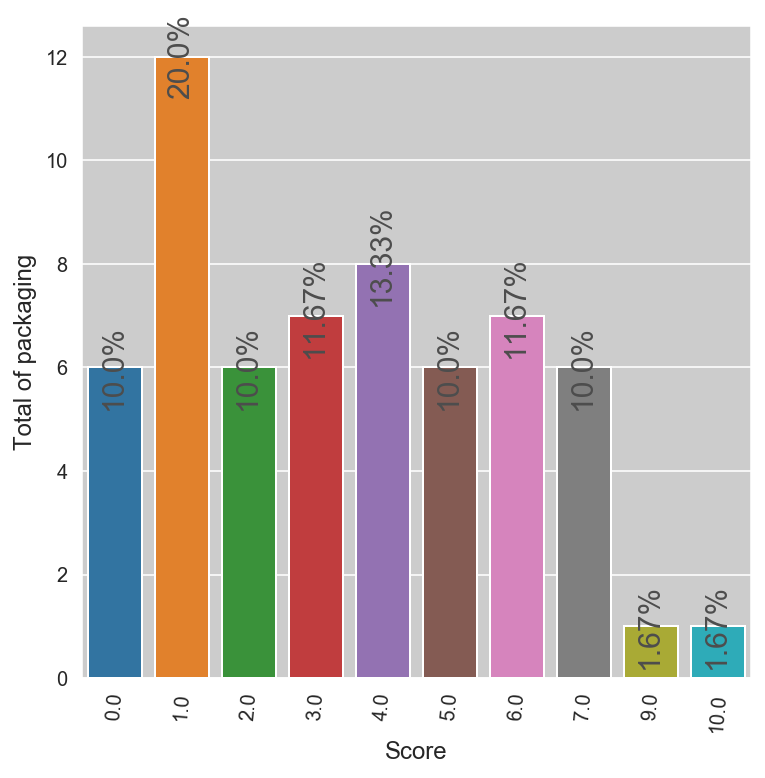

In [541]:
# Vefificando a variável alvo "situacao"
sns.set_style('darkgrid', {'axes.facecolor': '0.8','axes.edgecolor': '1.','grid.color': '1.','figure.edgecolor': '1.'})
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.countplot(x='score',data=scores_cleaned)

ax.set_xlabel("Score", fontsize=12)
ax.set_ylabel("Total of packaging", fontsize=12)
#ax.set_xticks([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 85)

# Textos na barra
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+0.17, i.get_height()-0.7, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='.3',rotation=90)
# prints    
print(color.BOLD + "Número de instâncias de cada classe da variável alvo" + color.END)
print(scores_cleaned.score.value_counts().to_string(index=False))
print(color.BOLD + "Embalagem(ns) vencedora(s) como mais sustentável(is)" + color.END)
print(scores_cleaned.loc[scores_cleaned.score == scores_cleaned.score.max()].to_string())

Conjuntos de dados desbalanceadas podem comprometer o desempenho da maioria dos algoritmos clássicos de classificação. Esses algoritmos assumem que as bases têm uma distribuição de exemplos equilibrada entre os grupos e que o custo por uma classificação errada é o mesmo para todas as classes (2).

De forma geral, as abordagens que têm sido propostas para a rotulação de instâncias em problemas com classes muito desbalanceadas seguem dois caminhos distintos (1). Um deles é o de atribuir custos diferenciados às classes durante a indução do modelo de classificação (3).  O outro caminho se baseia em reamostragem de dados (subamostragem ou sobreamostragem). 

Métodos de subamostragem (*undersampling*) removem elementos da classe majoritaria a fim de promover o  balanceamento. Os exemplos a serem eliminados podem ser escolhidos de forma aleatória (subamostragem aleatória) ou por meio de algum critério de seleção (subamostragem informativa), enquanto na sobreamostragem, dados da classe minoritária são replicados ou são gerados dados sintéticos.


#### Referências
1. Deepa,  T.  and  Punithavalli,  M. An analysis for mining imbalanced datasets. International Journal of Computer Science and Information Security vol. 8, pp. 132–137, 2010.

2. He, H. and Garcia, E. A. Learning from imbalanced data. IEEE Transactions on Knowledge and Data Engineering 21 (9): 1263–1284, 2009.

3. Zadrozny, B. , Langford, J., and Abe, N. Cost-sensitive learning by cost-proportionate example weighting. In Proceedings of the Third IEEE International Conference on Data Mining. ICDM ’03. IEEE Computer Society, pp. 435–, 2003.

### Pré-processamento dos dados

#### Convertendo recursos categóricos

A biblioteca do *scikit* trabalha exclusivamente com atributos numéricos. Logo, é necessário transformar os campos categóricos em variáveis *dummy* (a variável dummy é uma variável categegórica transformada em numérica). Caso contrário, nosso algoritmo de Machine Learning não aceitará esses atributos diretamente como entradas.

In [542]:
# Listando as colunas com variáveis categóricas
scores_cleaned.dtypes[scores_cleaned.dtypes == "object"].index

Index(['shape_URL', 'material_URL', 'surface_URL', 'color_URL',
       'constitution_URL'],
      dtype='object')

In [543]:
comparisons_train_cleaned.dtypes[comparisons_train_cleaned.dtypes == "object"].index
comparisons_tests_cleaned.dtypes[comparisons_tests_cleaned.dtypes == "object"].index


Index(['shape_theLess', 'material_theLess', 'surface_theLess', 'color_theLess',
       'constitution_theLess', 'shape_theMost', 'material_theMost',
       'surface_theMost', 'color_theMost', 'constitution_theMost'],
      dtype='object')

In [544]:
# Variáveis categóricas que serão utilizadas como preditores
scores_categories = pd.get_dummies(scores_cleaned[['shape_URL', 'material_URL', 'surface_URL', 'color_URL', 
                                          'constitution_URL']], drop_first=True)
comparisons_train_categories = pd.get_dummies(comparisons_train_cleaned[['shape_theLess', 'material_theLess', 'surface_theLess', 'color_theLess', 
                                          'constitution_theLess', 'shape_theMost', 'material_theMost', 'surface_theMost', 'color_theMost', 
                                          'constitution_theMost']], drop_first=True)
comparisons_tests_categories = pd.get_dummies(comparisons_tests_cleaned[['shape_theLess', 'material_theLess', 'surface_theLess', 'color_theLess', 
                                          'constitution_theLess', 'shape_theMost', 'material_theMost', 'surface_theMost', 'color_theMost', 
                                          'constitution_theMost']], drop_first=True)

In [545]:
scores_categories.head()

,shape_URL_Orgânica,material_URL_Papel Cartão,material_URL_Polímero,material_URL_Vidro,surface_URL_Fosca,color_URL_Neutra,constitution_URL_Ordem
URL,,,,,,,
https://drive.google.com/uc?export=view&id=1hwIG7voqAtG8Kpt3ntnhrPeZqjksG0ho,1,0,0,1,1,1,1
https://drive.google.com/uc?export=view&id=1V6Ll04rBT6lSAVGdnXPEZpYZ1mMFqhvi,1,0,0,1,1,1,0
https://drive.google.com/uc?export=view&id=1_2if1BxHQvLhvXGcU7qPxtlr8_xKAM02,1,0,0,1,1,0,1
https://drive.google.com/uc?export=view&id=1vzX7cDR4FzfTWoMQ_nuU6Fgdm7JNTcFb,1,0,0,1,1,0,0
https://drive.google.com/uc?export=view&id=12Xt1FjGTRXeL3p0Lq6yPA505H2ZSuFM4,1,0,0,1,0,1,1


In [546]:
comparisons_train_cleaned.tail()

,,shape_theLess,material_theLess,surface_theLess,color_theLess,constitution_theLess,shape_theMost,material_theMost,surface_theMost,color_theMost,constitution_theMost,result
theMost,theLess,,,,,,,,,,,
https://drive.google.com/uc?export=view&id=1mfLQhjYr3TAH9M7VMSu686AolMETp9qB,https://drive.google.com/uc?export=view&id=1vzX7cDR4FzfTWoMQ_nuU6Fgdm7JNTcFb,Orgânica,Vidro,Fosca,Intensa,Complexidade,Geométrica,Vidro,Brilhosa,Intensa,Complexidade,False
https://drive.google.com/uc?export=view&id=1V6Ll04rBT6lSAVGdnXPEZpYZ1mMFqhvi,https://drive.google.com/uc?export=view&id=1vzX7cDR4FzfTWoMQ_nuU6Fgdm7JNTcFb,Orgânica,Vidro,Fosca,Intensa,Complexidade,Orgânica,Vidro,Fosca,Neutra,Complexidade,True
https://drive.google.com/uc?export=view&id=1KoqUARhB9y0gYZHitZVHI2mj5KokUCH0,https://drive.google.com/uc?export=view&id=1wFYltt2_MY8dvqYmr4uNXmyxACR5_z3H,Geométrica,Polímero,Fosca,Intensa,Complexidade,Geométrica,Metal,Brilhosa,Neutra,Complexidade,True
https://drive.google.com/uc?export=view&id=1RhsOgqTgJ91jrswL0TTXPtckzrk-h3hN,https://drive.google.com/uc?export=view&id=1wFYltt2_MY8dvqYmr4uNXmyxACR5_z3H,Geométrica,Polímero,Fosca,Intensa,Complexidade,Orgânica,Metal,Fosca,Intensa,Ordem,True
https://drive.google.com/uc?export=view&id=1mfLQhjYr3TAH9M7VMSu686AolMETp9qB,https://drive.google.com/uc?export=view&id=1wFYltt2_MY8dvqYmr4uNXmyxACR5_z3H,Geométrica,Polímero,Fosca,Intensa,Complexidade,Geométrica,Vidro,Brilhosa,Intensa,Complexidade,False


In [547]:
comparisons_train_categories.tail()

,,shape_theLess_Orgânica,material_theLess_Papel Cartão,material_theLess_Polímero,material_theLess_Vidro,surface_theLess_Fosca,color_theLess_Neutra,constitution_theLess_Ordem,shape_theMost_Orgânica,material_theMost_Papel Cartão,material_theMost_Polímero,material_theMost_Vidro,surface_theMost_Fosca,color_theMost_Neutra,constitution_theMost_Ordem
theMost,theLess,,,,,,,,,,,,,,
https://drive.google.com/uc?export=view&id=1mfLQhjYr3TAH9M7VMSu686AolMETp9qB,https://drive.google.com/uc?export=view&id=1vzX7cDR4FzfTWoMQ_nuU6Fgdm7JNTcFb,1,0,0,1,1,0,0,0,0,0,1,0,0,0
https://drive.google.com/uc?export=view&id=1V6Ll04rBT6lSAVGdnXPEZpYZ1mMFqhvi,https://drive.google.com/uc?export=view&id=1vzX7cDR4FzfTWoMQ_nuU6Fgdm7JNTcFb,1,0,0,1,1,0,0,1,0,0,1,1,1,0
https://drive.google.com/uc?export=view&id=1KoqUARhB9y0gYZHitZVHI2mj5KokUCH0,https://drive.google.com/uc?export=view&id=1wFYltt2_MY8dvqYmr4uNXmyxACR5_z3H,0,0,1,0,1,0,0,0,0,0,0,0,1,0
https://drive.google.com/uc?export=view&id=1RhsOgqTgJ91jrswL0TTXPtckzrk-h3hN,https://drive.google.com/uc?export=view&id=1wFYltt2_MY8dvqYmr4uNXmyxACR5_z3H,0,0,1,0,1,0,0,1,0,0,0,1,0,1
https://drive.google.com/uc?export=view&id=1mfLQhjYr3TAH9M7VMSu686AolMETp9qB,https://drive.google.com/uc?export=view&id=1wFYltt2_MY8dvqYmr4uNXmyxACR5_z3H,0,0,1,0,1,0,0,0,0,0,1,0,0,0


In [548]:
comparisons_tests_categories.head()

,,shape_theLess_Orgânica,material_theLess_Papel Cartão,material_theLess_Polímero,material_theLess_Vidro,surface_theLess_Fosca,color_theLess_Neutra,constitution_theLess_Ordem,shape_theMost_Orgânica,material_theMost_Papel Cartão,material_theMost_Polímero,material_theMost_Vidro,surface_theMost_Fosca,color_theMost_Neutra,constitution_theMost_Ordem
theMost,theLess,,,,,,,,,,,,,,
https://drive.google.com/uc?export=view&id=1RQpLGRE6eq_jwPePnRe9ANi3Qqk_kXAj,https://drive.google.com/uc?export=view&id=12Xt1FjGTRXeL3p0Lq6yPA505H2ZSuFM4,1,0,0,1,0,1,1,0,1,0,0,1,1,0
https://drive.google.com/uc?export=view&id=1LdeS-2djkNqtanjlJBVa4DKslpufq686,https://drive.google.com/uc?export=view&id=12Xt1FjGTRXeL3p0Lq6yPA505H2ZSuFM4,1,0,0,1,0,1,1,1,0,0,0,1,1,1
https://drive.google.com/uc?export=view&id=1fYwhU8Om7S1UUdbNGqZG57ZMBw8dUYfq,https://drive.google.com/uc?export=view&id=13tAw6SGyLpVb1vAoxduCwxrfKu2yibwJ,0,0,1,0,0,0,0,0,0,0,1,1,1,1
https://drive.google.com/uc?export=view&id=13tAw6SGyLpVb1vAoxduCwxrfKu2yibwJ,https://drive.google.com/uc?export=view&id=14UQ8tJzAvLGTNP0KiJrEbsuQTxAJcuvn,1,0,1,0,0,0,0,0,0,1,0,0,0,0
https://drive.google.com/uc?export=view&id=1fYwhU8Om7S1UUdbNGqZG57ZMBw8dUYfq,https://drive.google.com/uc?export=view&id=14UQ8tJzAvLGTNP0KiJrEbsuQTxAJcuvn,1,0,1,0,0,0,0,0,0,0,1,1,1,1


In [549]:
# Criando o dataset de treino após o pré-processamento
# Criando novo dataset com as variáveis numéricas e as variáveis dummy
comparisons_train_final = pd.concat([comparisons_train_cleaned[['result']],comparisons_train_categories],axis=1)
comparisons_tests_final = pd.concat([comparisons_tests_cleaned[['result']],comparisons_tests_categories],axis=1)
scores_final = pd.concat([scores_cleaned[['score']],scores_categories],axis=1)
# Convertendo os valores da variável alvo em numéricos (0, para não eleitos e 1 para eleitos)
comparisons_train_final['result'] = np.where(comparisons_train_final['result']==True, 1,0)
comparisons_tests_final['result'] = np.where(comparisons_tests_final['result']==True, 1,0)

In [550]:
# Verificando se há diferença de colunas após a criação das variáveis dummy
(set(comparisons_train_final.columns) - (set(comparisons_tests_final.columns)))

set()

In [551]:
### Separando as variáveis preditodas e alvo 
# variáveis preditoras
X_train_comparisons = comparisons_train_final.drop('result',axis=1)
X_tests_comparisons = comparisons_tests_final.drop('result',axis=1)
X_scores = scores_final.drop('score',axis=1)
# variável alvo
y_train_comparisons = comparisons_train_final['result']
y_tests_comparisons = comparisons_tests_final['result']
y_scores = scores_final['score']

### Métricas de Classificação

Utilizaremos as seguintes méticas para a avaliação dos modelos:

#### Acurácia

   É basicamente o número de acertos (positivos) divido pelo número total de exemplos. Ela deve ser usada em datasets com a mesma proporção de exemplos para cada classe, e quando as penalidades de acerto e erro para cada classe forem as mesmas.

   Em problemas com classes desproporcionais, ela causa uma falsa impressão de bom desempenho. Por exemplo, num dataset em que 80% dos exemplos pertençam a uma classe, só de classificar todos os exemplos naquela classe já se atinge uma precisão de 80%, mesmo que todos os exemplos da outra classe estejam classificados incorretamente.

    $Acurácia = \frac{Verdadeiros Positivos (TP) + Falsos Positivos (TP)}{Total}$

#### Precisão

   Número de exemplos classificados como pertencentes a uma classe, que realmente são daquela classe (verdadeiros positivos), dividido pela soma entre este número, e o número de exemplos classificados nesta classe, mas que pertencem a outras (falsos positivos).

    $Precisão = \frac{Verdadeiros Positivos (TP)}{Verdadeiros Positivos (TP) + Falsos Positivos (TP)}$

#### Recall

   Número de exemplos classificados como pertencentes a uma classe, que realmente são daquela classe, dividido pela quantidade total de exemplos que pertencem a esta classe, mesmo que sejam classificados em outra. No caso binário, verdadeiros positivos divididos por total de positivos.

    $Recall = \frac{Verdadeiros Positivos (TP)}{Verdadeiros Positivos (TP) + Falsos Negativos (FN)}$

#### F1 Score

   O F1 Score é uma média harmônica entre precisão e recall.

   Ela é muito boa quando você possui um dataset com classes desproporcionais, e o seu modelo não emite probabilidades. Isso não significa que não possa ser usada com modelos que emitem probabilidades, tudo depende do objetivo de sua tarefa de machine learning.

   Em geral, quanto maior o F1 score, melhor.    

    $F1 Score = \frac{2 * precisão * recall}{precisão + recall}$

#### AUC – Area Under the ROC Curve

<img src="auc.png" width="300" height="300"  align="left"/> 

   Esta é uma métrica interessante para tarefas com classes desproporcionais. Nela, mede-se a área sob uma curva formada pelo gráfico entre a taxa de exemplos positivos, que realmente são positivos, e a taxa de falsos positivos.

   Uma das vantagens em relação ao F1 Score, é que ela mede o desempenho do modelo em vários pontos de corte, não necessariamente atribuindo exemplos com probabilidade maior que 50% para a classe positiva, e menor, para a classe negativa.

   Em sistemas que se interessam apenas pela classe, e não pela probabilidade, ela pode ser utilizada para definir o melhor ponto de corte para atribuir uma ou outra classe a um exemplo. Este ponto de corte normalmente é o ponto que se localiza mais à esquerda, e para o alto, no gráfico, mas depende bastante do custo do erro na previsão de uma determinada classe.
   
Fonte: http://mariofilho.com/as-metricas-mais-populares-para-avaliar-modelos-de-machine-learning/


#### Essas méticas no Scikit-Learn

*metrics.accuracy_score(y_true, y_pred[, …])* ->  Accuracy classification score.
 
*metrics.precision_score(y_true, y_pred[, …])* -> Compute the precision

*metrics.f1_score(y_true, y_pred[, labels, …])* -> Compute the F1 score, also known as balanced F-score or F-measure

*metrics.recall_score(y_true, y_pred[, …])* -> 	Compute the recall

*metrics.roc_auc_score(y_true, y_score[, …])* -> 	Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.

*metrics.classification_report(y_true, y_pred)* -> 	Build a text report showing the main classification metrics

*metrics.confusion_matrix(y_true, y_pred[, …])* -> 	Compute confusion matrix to evaluate the accuracy of a classification

###  Como ler uma Matriz de Confusão

<img src="matrizConfusao.png" width="300" height="300"  align="left"/>

### Importando as bibliotecas para as métricas

In [552]:
# Importando as bibliotecas para as métricas
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, roc_auc_score, recall_score
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix, plot_learning_curves

## Construindo os modelos

### MODELO 01  - Regressão Logística

Primeiramente vamos criar um modelo de regressão logística simples para vermos como se comporta

#### Divisão treino-teste

In [553]:
from sklearn.model_selection import train_test_split
# Vamos começar dividindo nossos dados em um conjunto de treinamento e conjunto de testes.
X_train_comparisons_train, X_train_comparisons_valid, y_train_comparisons_train, y_train_comparisons_valid = train_test_split(X_train_comparisons, y_train_comparisons, test_size=0.30,random_state=101)
X_scores_train, X_scores_test, y_scores_train, y_scores_test = train_test_split(X_scores, y_scores, test_size=0.30,random_state=101)


#### Treino e predição

In [554]:
from sklearn.linear_model import LogisticRegression
# Treinando o modelo
logit_comparisons = LogisticRegression(solver='lbfgs', max_iter=400)
# Fit do modelo
logit_comparisons.fit(X_train_comparisons_train,y_train_comparisons_train)
# Predição do modelo
logit_pred_comparisons = logit_comparisons.predict(X_train_comparisons_valid)

In [555]:
from sklearn.linear_model import LogisticRegression
# Treinando o modelo
logit_scores = LogisticRegression(solver='lbfgs', max_iter=400, multi_class='auto')
# Fit do modelo
logit_scores.fit(X_scores_train,y_scores_train)
# Predição do modelo
logit_pred_scores = logit_scores.predict(X_scores_test)

#### Avaliação do modelo

In [556]:
# Métricas
print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(y_train_comparisons_valid,logit_pred_comparisons),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(y_train_comparisons_valid,logit_pred_comparisons),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(y_train_comparisons_valid,logit_pred_comparisons),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(y_train_comparisons_valid,logit_pred_comparisons),2)))
print(color.BOLD + 'AUC: ' + color.END + str(round(roc_auc_score(y_train_comparisons_valid,logit_pred_comparisons),2)))


print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(y_scores_test,logit_pred_scores),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(y_scores_test,logit_pred_scores,average='micro'),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(y_scores_test,logit_pred_scores,average='micro'),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(y_scores_test,logit_pred_scores,average='micro'),2)))
#print(color.BOLD + 'AUC: ' + color.END + str(round(roc_auc_score(y_scores_test,logit_pred_scores,average='micro'),2)))

# Print do relatório de classificação
cr = classification_report(y_train_comparisons_valid,logit_pred_comparisons)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))

cr = classification_report(y_scores_test,logit_pred_scores)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))

Acurácia do modelo: 0.88
Precision: 0.86
F1 do modelo: 0.9
Recall do modelo: 0.95
AUC: 0.86
Acurácia do modelo: 0.0
Precision: 0.0
F1 do modelo: 0.0
Recall do modelo: 0.0

Relatório de Classificação
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.86      0.95      0.90        38

    accuracy                           0.88        65
   macro avg       0.89      0.86      0.87        65
weighted avg       0.88      0.88      0.88        65


Relatório de Classificação
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       4.0
         1.0       0.00      0.00      0.00       0.0
         2.0       0.00      0.00      0.00       1.0
         3.0       0.00      0.00      0.00       3.0
         4.0       0.00      0.00      0.00       4.0
         5.0       0.00      0.00      0.00       2.0
         6.0       0.00      0.00      0.00       1.0
         7.0 

C:\Users\tclem\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\tclem\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



Matriz de confusão
[[21  6]
 [ 2 36]]


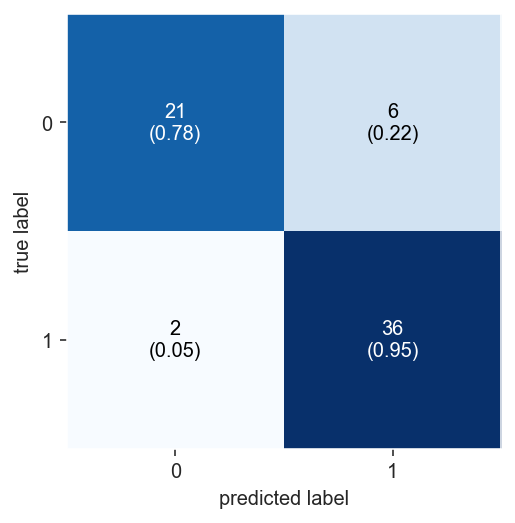

In [557]:


# adicionando resultado na matriz de confusão
cm = confusion_matrix(y_train_comparisons_valid,logit_pred_comparisons)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm, show_normed=True)

plt.show()


Matriz de confusão
[[0 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 1 1 0 0 1 0 0]
 [0 2 1 0 0 0 1 0]
 [0 2 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 1 0 1 1 0 0 0]]


C:\Users\tclem\Anaconda3\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:66: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


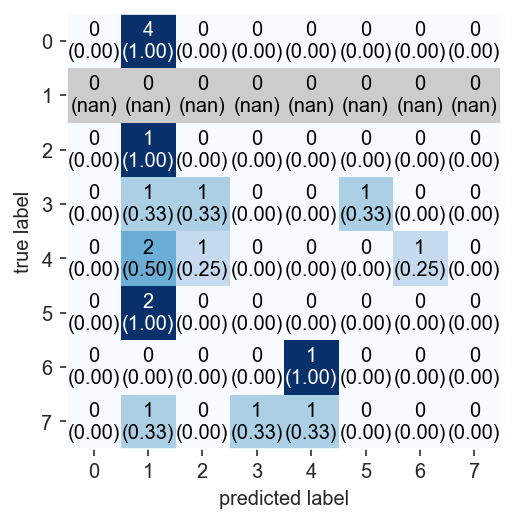

In [558]:


# adicionando resultado na matriz de confusão
cm = confusion_matrix(y_scores_test,logit_pred_scores)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm, show_normed=True)

plt.show()

#### Importância dos Atributos

In [559]:
# Coeficientes - Logistic Regression
coef_logit_comparisons = pd.DataFrame((logit_comparisons.coef_[0]), index = X_train_comparisons_train.columns.values, columns=['Coefficient'])
coef_logit_comparisons = coef_logit_comparisons.sort_values(by='Coefficient', ascending=False)

coef_logit_scores = pd.DataFrame((logit_scores.coef_[0]), index = X_scores_train.columns.values, columns=['Coefficient'])
coef_logit_scores = coef_logit_scores.sort_values(by='Coefficient', ascending=False)

# Importância dos Atributos
preditores_comparisons=list(X_train_comparisons_train)
feat_score_comparisons = abs(logit_comparisons.coef_[0])
feat_imp_comparisons = pd.Series(feat_score_comparisons, preditores_comparisons).sort_values(ascending=False)

preditores_scores=list(X_scores_train)
feat_score_scores = abs(logit_scores.coef_[0])
feat_imp_scores = pd.Series(feat_score_scores, preditores_scores).sort_values(ascending=False)


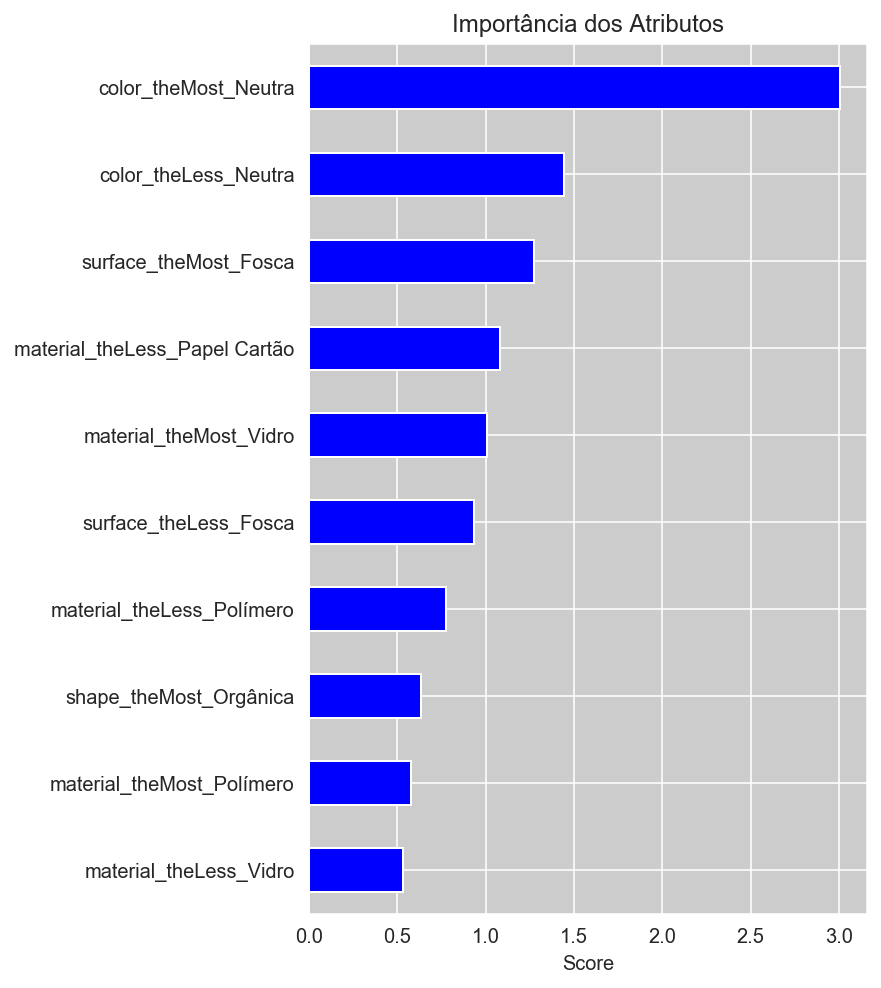

In [560]:
#Plot
plt.subplots(figsize=(5, 8))
feat_imp_comparisons.head(10).plot(kind='barh', title='Importância dos Atributos', color='blue')
plt.xlabel('Score')
plt.gca().invert_yaxis()

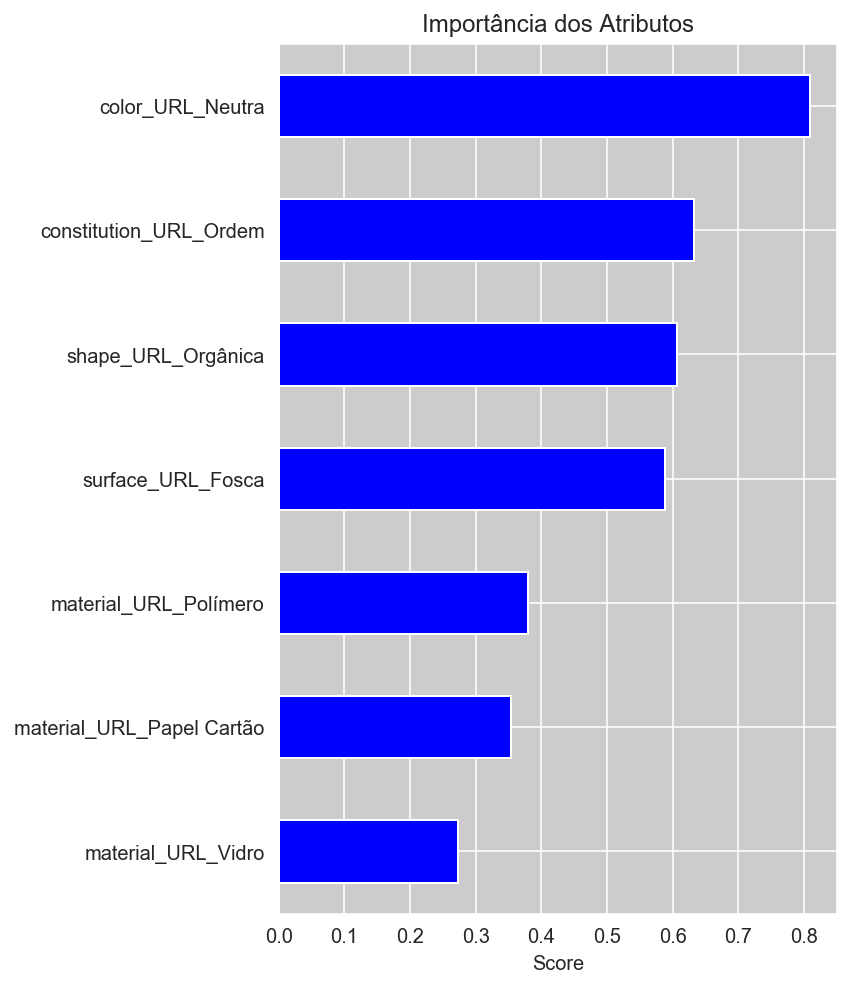

In [561]:
#Plot
plt.subplots(figsize=(5, 8))
feat_imp_scores.head(10).plot(kind='barh', title='Importância dos Atributos', color='blue')
plt.xlabel('Score')
plt.gca().invert_yaxis()

Verificamos que no modelo Logistic Regression os atributos mais importantes são os acima listado em ordem decrescente de importância.

#### Desempenho treino/teste

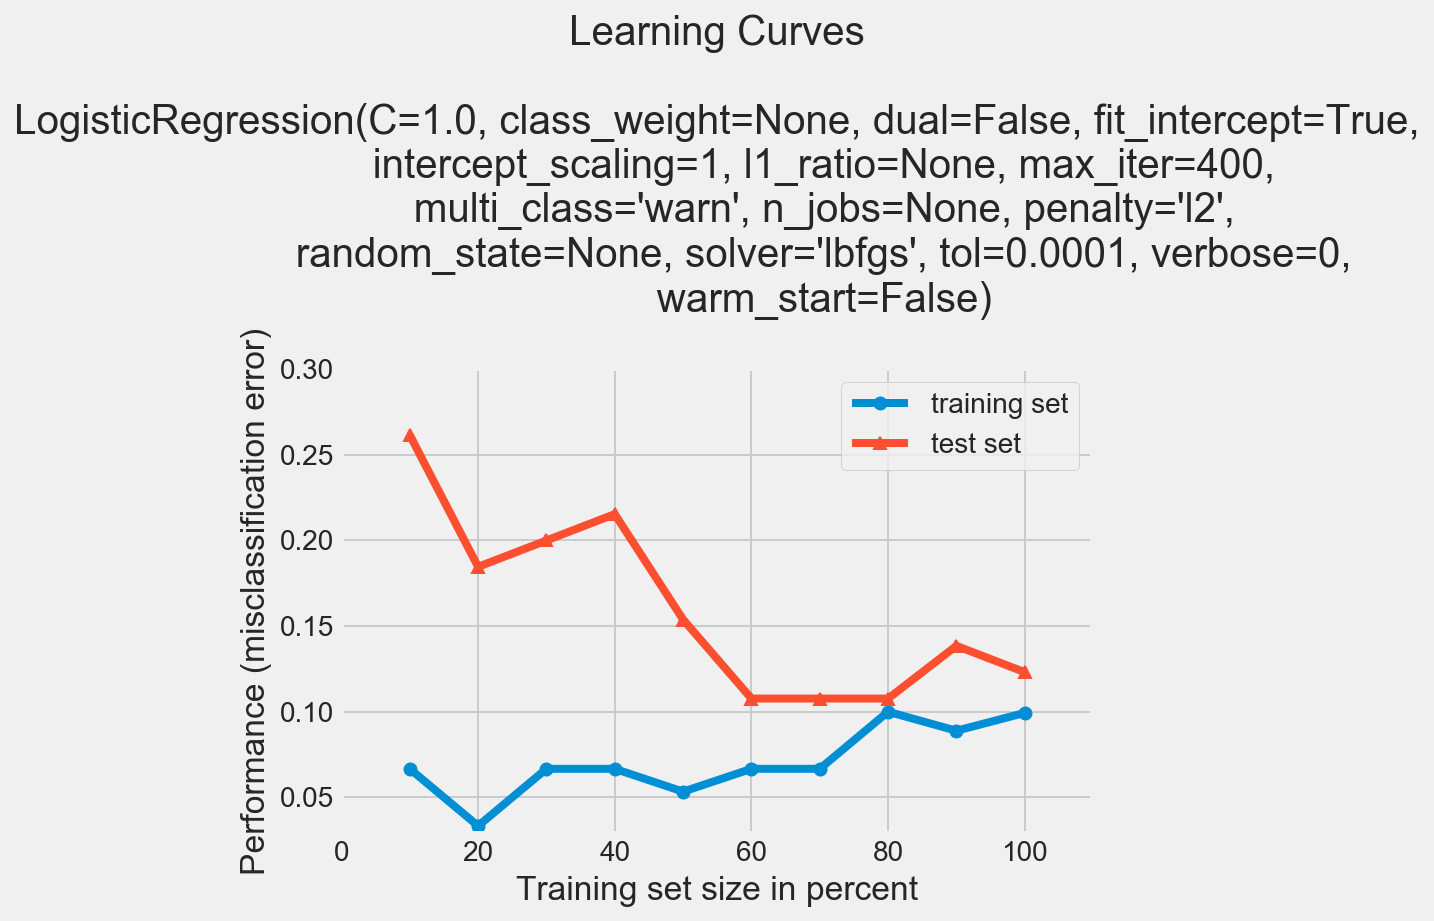

In [562]:
plot_learning_curves(X_train_comparisons_train,y_train_comparisons_train, X_train_comparisons_valid, y_train_comparisons_valid, logit_comparisons)
plt.show()



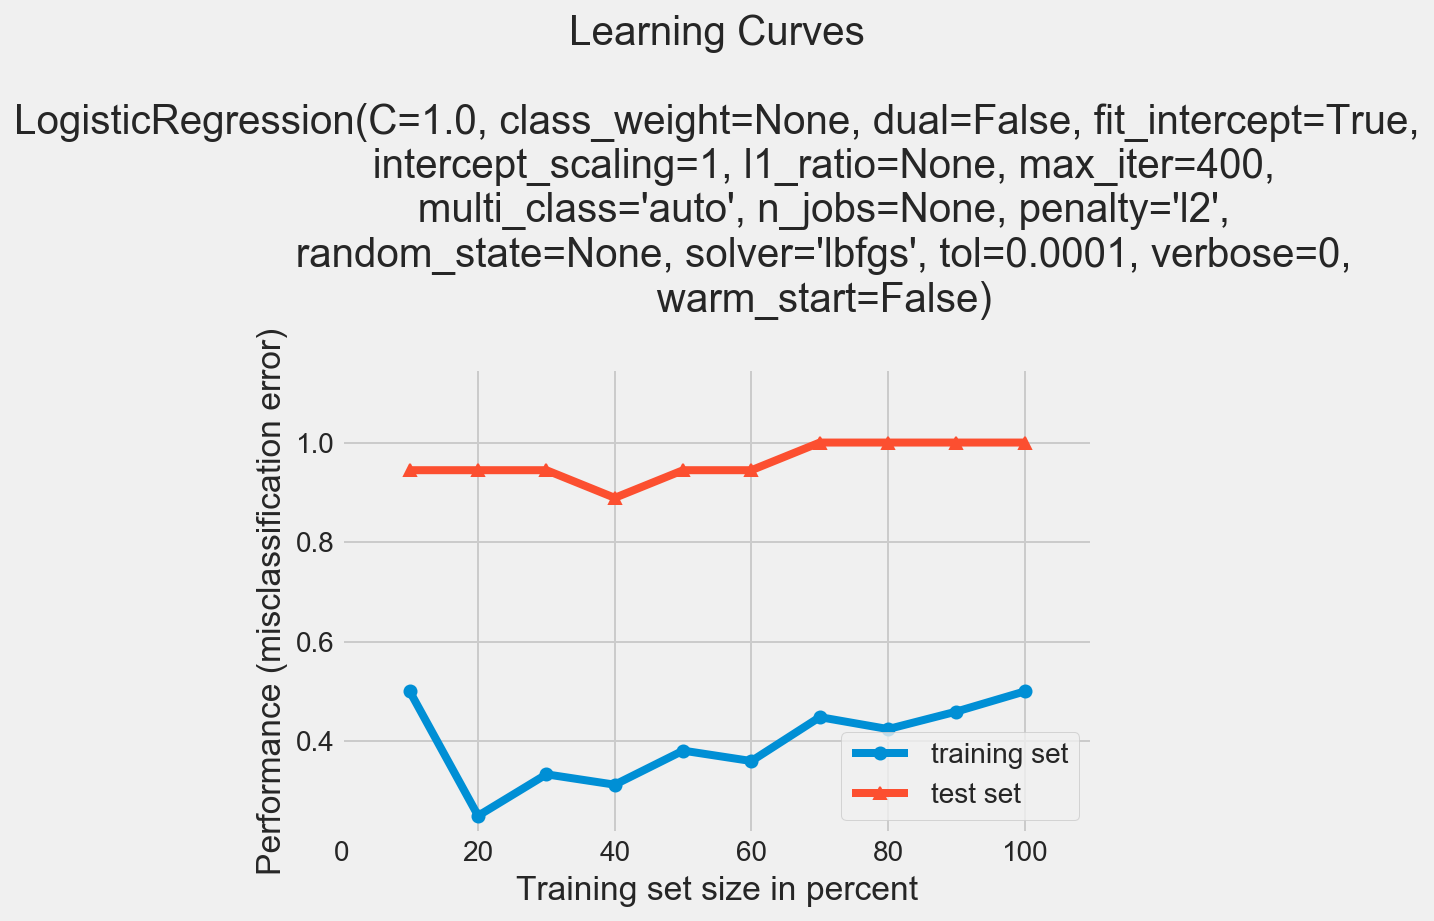

In [563]:
plot_learning_curves(X_scores_train,y_scores_train, X_scores_test, y_scores_test, logit_scores)
plt.show()

O modelo está seguindo o mesmo padrão tanto para os dados de teste como para os de validação, isso significa que não temos overfitting (o modelo parece ter generalizado bem). No entanto o erro é considerável para os dois conjuntos e as curvas se achatam muito rapidamente, nos parecendo que há underfitting.

### MODELO 03  - KNN

In [564]:
# Carregando a biblioteca para a criação do modelo
from sklearn.neighbors import KNeighborsClassifier

In [565]:
# Modelo com apenas um vizinho
knn_scores = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto')
knn_comparisons = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto')

In [566]:
# Fitando o modelo
knn_scores.fit(X_scores_train,y_scores_train)
knn_comparisons.fit(X_train_comparisons_train,y_train_comparisons_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [567]:
# Predição do modelo
knn_pred_scores = knn_scores.predict(X_scores_test)
knn_pred_comparisons = knn_comparisons.predict(X_train_comparisons_valid)

In [568]:
# Avaliando o modelo
# Acurácia
print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(y_scores_test,knn_pred_scores),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(y_scores_test,knn_pred_scores,average='micro'),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(y_scores_test,knn_pred_scores,average='micro'),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(y_scores_test,knn_pred_scores,average='micro'),2)))
#print(color.BOLD + 'AUC ROC: ' + color.END + str(round(roc_auc_score(y_scores_test,knn_pred_scores,average='micro'),2)))

print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(y_train_comparisons_valid,knn_pred_comparisons),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(y_train_comparisons_valid,knn_pred_comparisons),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(y_train_comparisons_valid,knn_pred_comparisons),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(y_train_comparisons_valid,knn_pred_comparisons),2)))
print(color.BOLD + 'AUC ROC: ' + color.END + str(round(roc_auc_score(y_train_comparisons_valid,knn_pred_comparisons),2)))

# Print do relatório de classificação
cr = classification_report(y_scores_test,knn_pred_scores)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))

cr = classification_report(y_train_comparisons_valid,knn_pred_comparisons)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))

Acurácia do modelo: 0.17
Precision: 0.17
F1 do modelo: 0.17
Recall do modelo: 0.17
Acurácia do modelo: 0.82
Precision: 0.84
F1 do modelo: 0.84
Recall do modelo: 0.84
AUC ROC: 0.81

Relatório de Classificação
              precision    recall  f1-score   support

         0.0       0.50      0.25      0.33         4
         1.0       0.00      0.00      0.00         0
         2.0       0.33      1.00      0.50         1
         3.0       1.00      0.33      0.50         3
         4.0       0.00      0.00      0.00         4
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00         3

    accuracy                           0.17        18
   macro avg       0.23      0.20      0.17        18
weighted avg       0.30      0.17      0.19        18


Relatório de Classificação
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        27
    

C:\Users\tclem\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\tclem\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



Matriz de confusão
[[1 1 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 1 1 0 1 0 0]
 [0 2 1 0 0 0 1 0]
 [1 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0]
 [0 2 0 0 0 1 0 0]]


C:\Users\tclem\Anaconda3\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:66: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


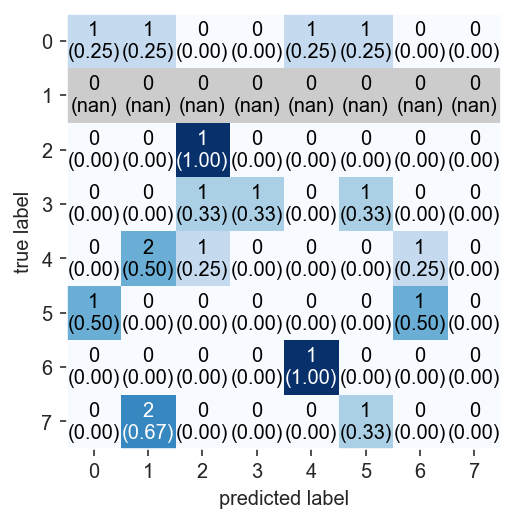

In [569]:


# adicionando resultado na matriz de confusão
cm = confusion_matrix(y_scores_test,knn_pred_scores)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm, show_normed=True)

plt.show()


Matriz de confusão
[[21  6]
 [ 6 32]]


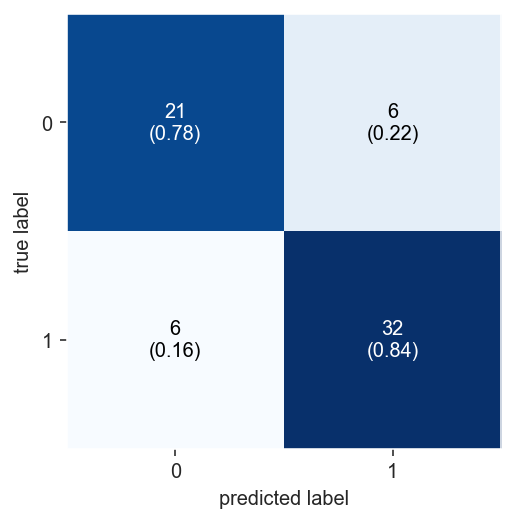

In [570]:


# adicionando resultado na matriz de confusão
cm = confusion_matrix(y_train_comparisons_valid,knn_pred_comparisons)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm, show_normed=True)

plt.show()

In [571]:


# Predicão do dataset de validação
test_pred = knn_comparisons.predict(X_tests_comparisons)
# Dataset para apresentação
previsao = X_tests_comparisons.index
previsao.columns=['Id']
previsao = pd.DataFrame(previsao)
previsao['Predicted'] = test_pred
previsao.columns=['Id', 'Predicted']
previsao.reset_index()
previsao.set_index(['Id', 'Predicted'])
previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
#previsao.head(10)
# Contando a predição
previsao.Predicted.value_counts()

eleito        19
nao_eleito    17
Name: Predicted, dtype: int64

In [572]:
# Predicão do dataset de validação
test_pred = knn.predict(X_tests_comparisons)
# Dataset para apresentação
previsao = teste.sequencial_candidato
previsao = pd.DataFrame(previsao)
previsao['Predicted'] = test_pred
previsao.columns=['Id', 'Predicted']
previsao.reset_index()
previsao.set_index(['Id', 'Predicted'])
previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
#previsao.head(10)
# Contando a predição
previsao.Predicted.value_counts()

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 14 while Y.shape[1] == 7

In [573]:
# Verificando qual o melhor número de vizinhos
error_rate = []

# Levará algum tempo
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_comparisons_train,y_train_comparisons_train)
    pred_i = knn.predict(X_train_comparisons_valid)
    error_rate.append(np.mean(pred_i != y_train_comparisons_valid))

Text(0, 0.5, 'Error Rate')

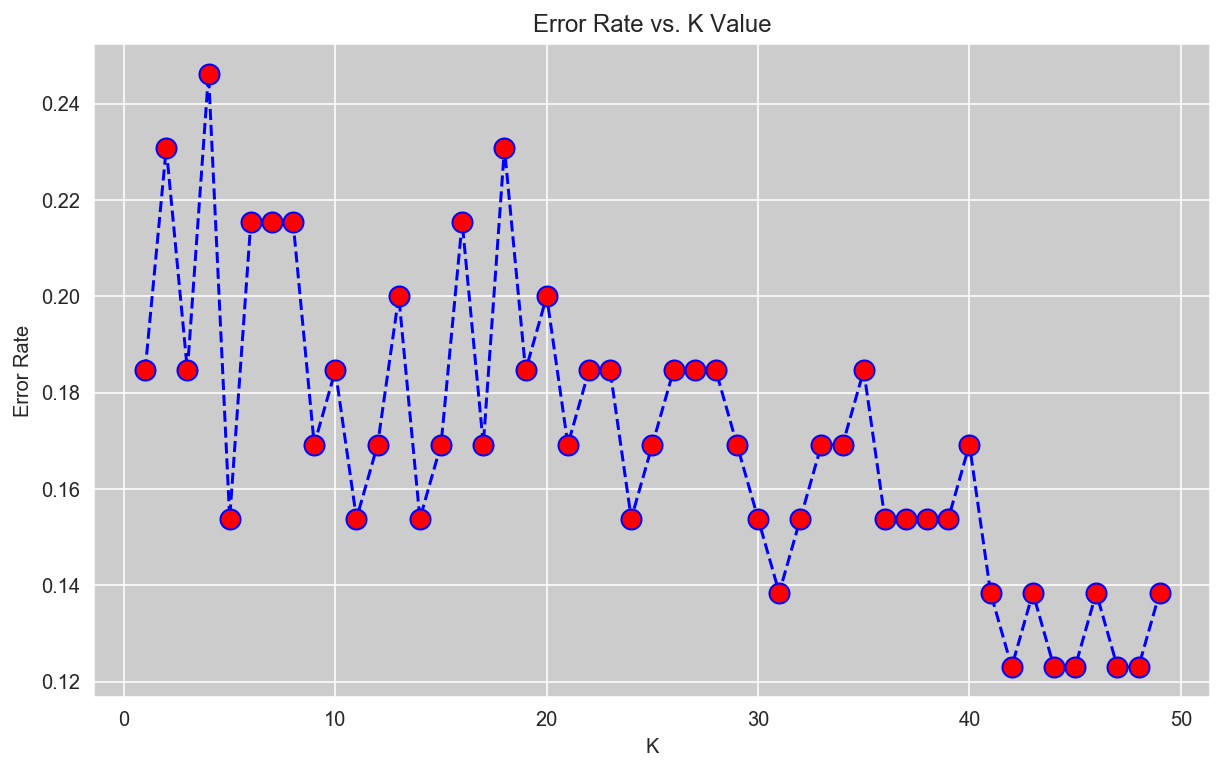

In [574]:
# Plotando a figura
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [575]:
# Verificando qual o melhor número de vizinhos
error_rate = []

# Levará algum tempo
for i in range(1,42):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_scores_train,y_scores_train)
    pred_i = knn.predict(X_scores_test)
    error_rate.append(np.mean(pred_i != y_scores_test))

ValueError: x and y must have same first dimension, but have shapes (49,) and (41,)

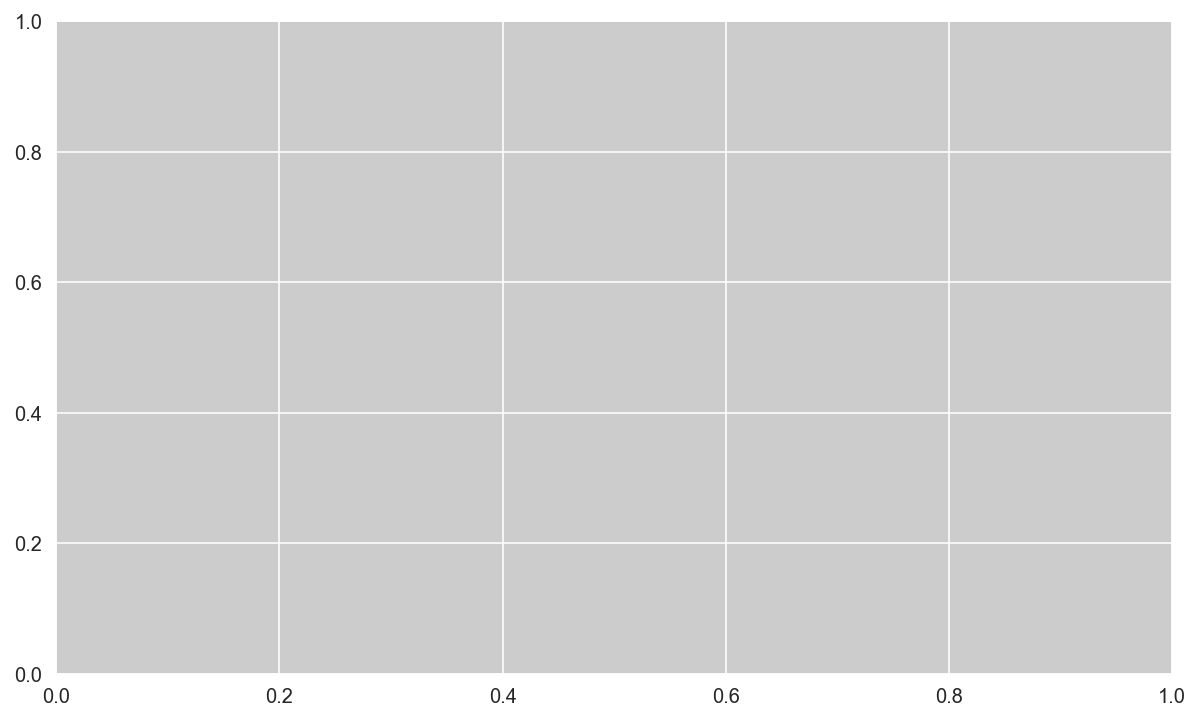

In [576]:
# Plotando a figura
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [577]:
# Agora com K=45
knn_comparisons = KNeighborsClassifier(n_neighbors=2)#escolha o melhor resultado do gráfico acima
# Fitando o modelo
knn_comparisons.fit(X_train_comparisons_train,y_train_comparisons_train)
# Predições
knn_pred_comparisons = knn_comparisons.predict(X_train_comparisons_valid)

Acurácia do modelo: 0.77
Precision: 0.93
F1 do modelo: 0.77
Recall do modelo: 0.66
AUC ROC: 0.79

Relatório de Classificação
              precision    recall  f1-score   support

           0       0.66      0.93      0.77        27
           1       0.93      0.66      0.77        38

    accuracy                           0.77        65
   macro avg       0.79      0.79      0.77        65
weighted avg       0.81      0.77      0.77        65


Matriz de confusão
[[25  2]
 [13 25]]


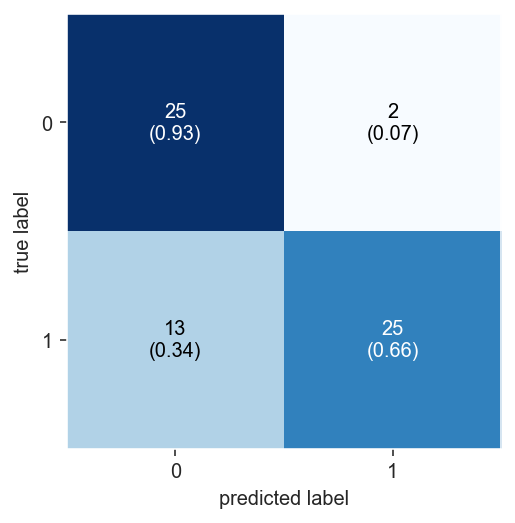

In [578]:
# Avaliando o modelo
# Acurácia
print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(y_train_comparisons_valid,knn_pred_comparisons),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(y_train_comparisons_valid,knn_pred_comparisons),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(y_train_comparisons_valid,knn_pred_comparisons),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(y_train_comparisons_valid,knn_pred_comparisons),2)))
print(color.BOLD + 'AUC ROC: ' + color.END + str(round(roc_auc_score(y_train_comparisons_valid,knn_pred_comparisons),2)))

# Print do relatório de classificação
cr = classification_report(y_train_comparisons_valid,knn_pred_comparisons)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))

# adicionando resultado na matriz de confusão
cm = confusion_matrix(y_train_comparisons_valid,knn_pred_comparisons)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm, show_normed=True)

plt.show()

##### Desempenho treino/teste

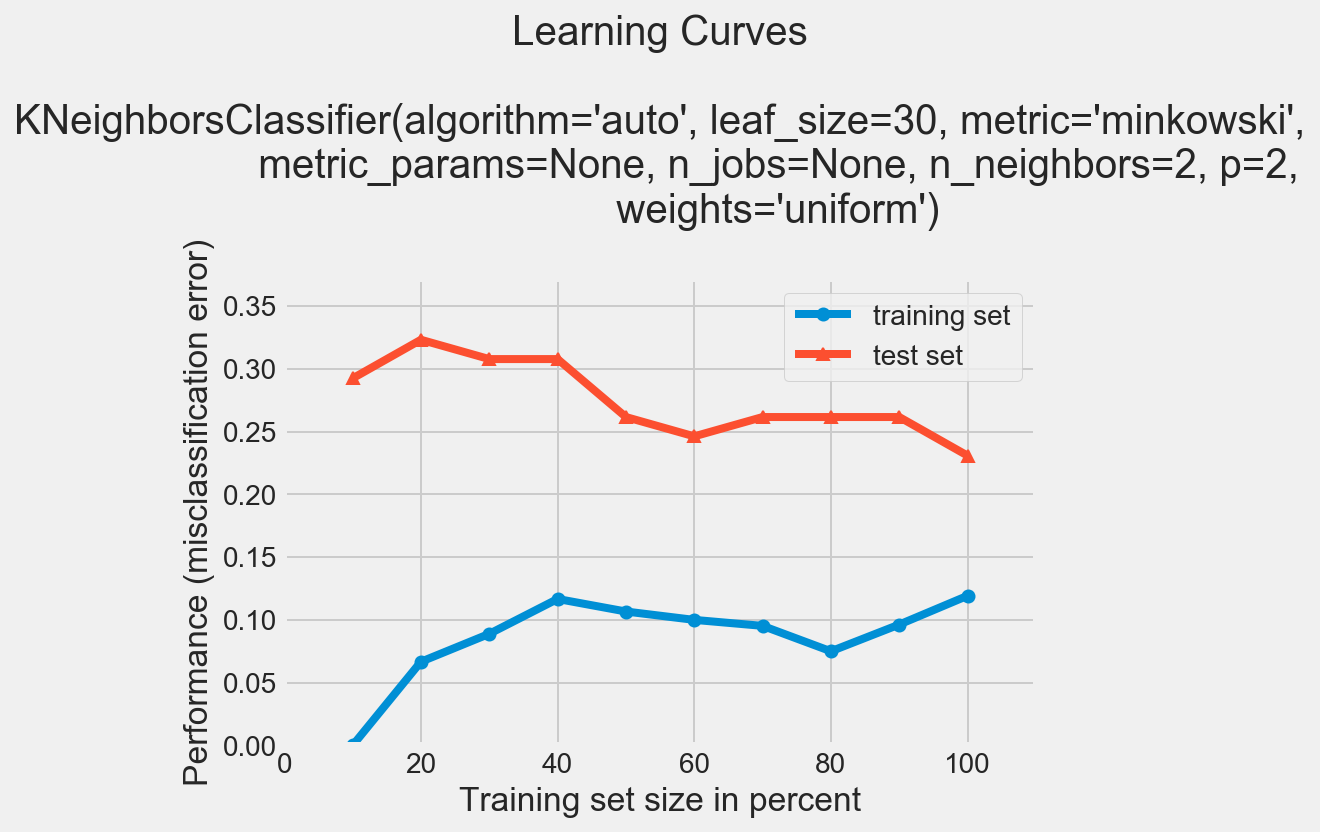

In [579]:
plot_learning_curves(X_train_comparisons_train,y_train_comparisons_train, X_train_comparisons_valid, y_train_comparisons_valid, knn_comparisons)
plt.show()

#### Predicão do dataset de 2014

In [580]:
# Predicão do dataset de validação
test_pred = knn_comparisons.predict(X_tests_comparisons)
# Dataset para apresentação
previsao = X_tests_comparisons.index
previsao.columns=['Id']
previsao = pd.DataFrame(previsao)
previsao['Predicted'] = test_pred
previsao.columns=['Id', 'Predicted']
previsao.reset_index()
previsao.set_index(['Id', 'Predicted'])
previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
#previsao.head(10)
# Contando a predição
previsao.Predicted.value_counts()


# Predicão do dataset de validação
#test_pred = knn.predict(df_valid)
# Dataset para apresentação
#previsao = teste.sequencial_candidato
#previsao = pd.DataFrame(previsao)
#previsao['Predicted'] = test_pred
#previsao.columns=['Id', 'Predicted']
#previsao.reset_index()
#previsao.set_index(['Id', 'Predicted'])
#previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
# Contando a predição
#previsao.Predicted.value_counts()

nao_eleito    20
eleito        16
Name: Predicted, dtype: int64

### MODELO 04 - Árvores Extras

In [581]:
# Biblioteca para o modelo
from sklearn.tree import DecisionTreeClassifier

In [582]:

# Criando o modelo
dtree_comparisons = DecisionTreeClassifier()
# Fitando o modelo
dtree_comparisons.fit(X_train_comparisons_train,y_train_comparisons_train)
# Predição
dtree_pred_comparisons = dtree_comparisons.predict(X_train_comparisons_valid)

In [583]:
# Criando o modelo
dtree_scores = DecisionTreeClassifier()
# Fitando o modelo
dtree_scores.fit(X_scores_train,y_scores_train)
# Predição
dtree_pred_scores = dtree_scores.predict(X_scores_test)

In [584]:
# Acurácia
print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(y_train_comparisons_valid,dtree_pred_comparisons),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(y_train_comparisons_valid,dtree_pred_comparisons),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(y_train_comparisons_valid,dtree_pred_comparisons),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(y_train_comparisons_valid,dtree_pred_comparisons),2)))
print(color.BOLD + 'AUC ROC: ' + color.END + str(round(roc_auc_score(y_train_comparisons_valid,dtree_pred_comparisons),2)))

print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(y_scores_test,dtree_pred_scores),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(y_scores_test,dtree_pred_scores,average='micro'),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(y_scores_test,dtree_pred_scores,average='micro'),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(y_scores_test,dtree_pred_scores,average='micro'),2)))
#print(color.BOLD + 'AUC ROC: ' + color.END + str(round(roc_auc_score(y_scores_test,dtree_pred_scores,average='micro'),2)))

# Print do relatório de classificação
cr = classification_report(y_train_comparisons_valid,dtree_pred_comparisons)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))

cr = classification_report(y_scores_test,dtree_pred_scores)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))


Acurácia do modelo: 0.86
Precision: 0.89
F1 do modelo: 0.88
Recall do modelo: 0.87
AUC ROC: 0.86
Acurácia do modelo: 0.0
Precision: 0.0
F1 do modelo: 0.0
Recall do modelo: 0.0

Relatório de Classificação
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.89      0.87      0.88        38

    accuracy                           0.86        65
   macro avg       0.86      0.86      0.86        65
weighted avg       0.86      0.86      0.86        65


Relatório de Classificação
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       4.0
         1.0       0.00      0.00      0.00       0.0
         2.0       0.00      0.00      0.00       1.0
         3.0       0.00      0.00      0.00       3.0
         4.0       0.00      0.00      0.00       4.0
         5.0       0.00      0.00      0.00       2.0
         6.0       0.00      0.00      0.00       1.0
        

C:\Users\tclem\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\tclem\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



Matriz de confusão
[[23  4]
 [ 5 33]]


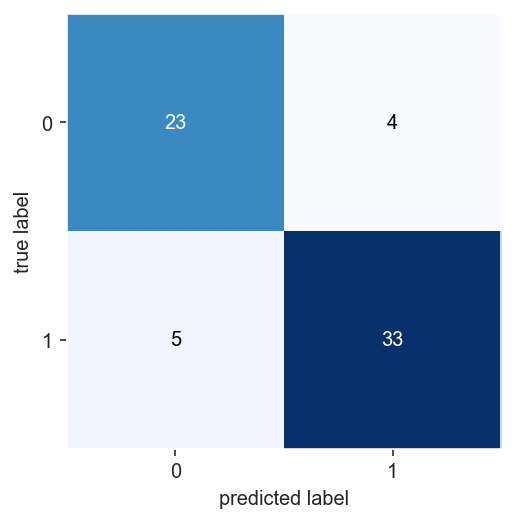

In [585]:

# adicionando resultado na matriz de confusão
cm = confusion_matrix(y_train_comparisons_valid,dtree_pred_comparisons)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm)

plt.show()


Matriz de confusão
[[0 2 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 1]
 [0 1 0 1 0 1 0 0 1]
 [1 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 1 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0]]


C:\Users\tclem\Anaconda3\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:66: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


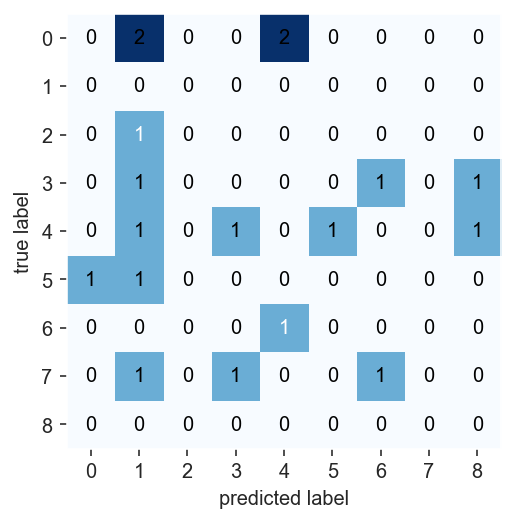

In [586]:

# adicionando resultado na matriz de confusão
cm = confusion_matrix(y_scores_test,dtree_pred_scores)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm)

plt.show()

#### Desempenho treino/teste

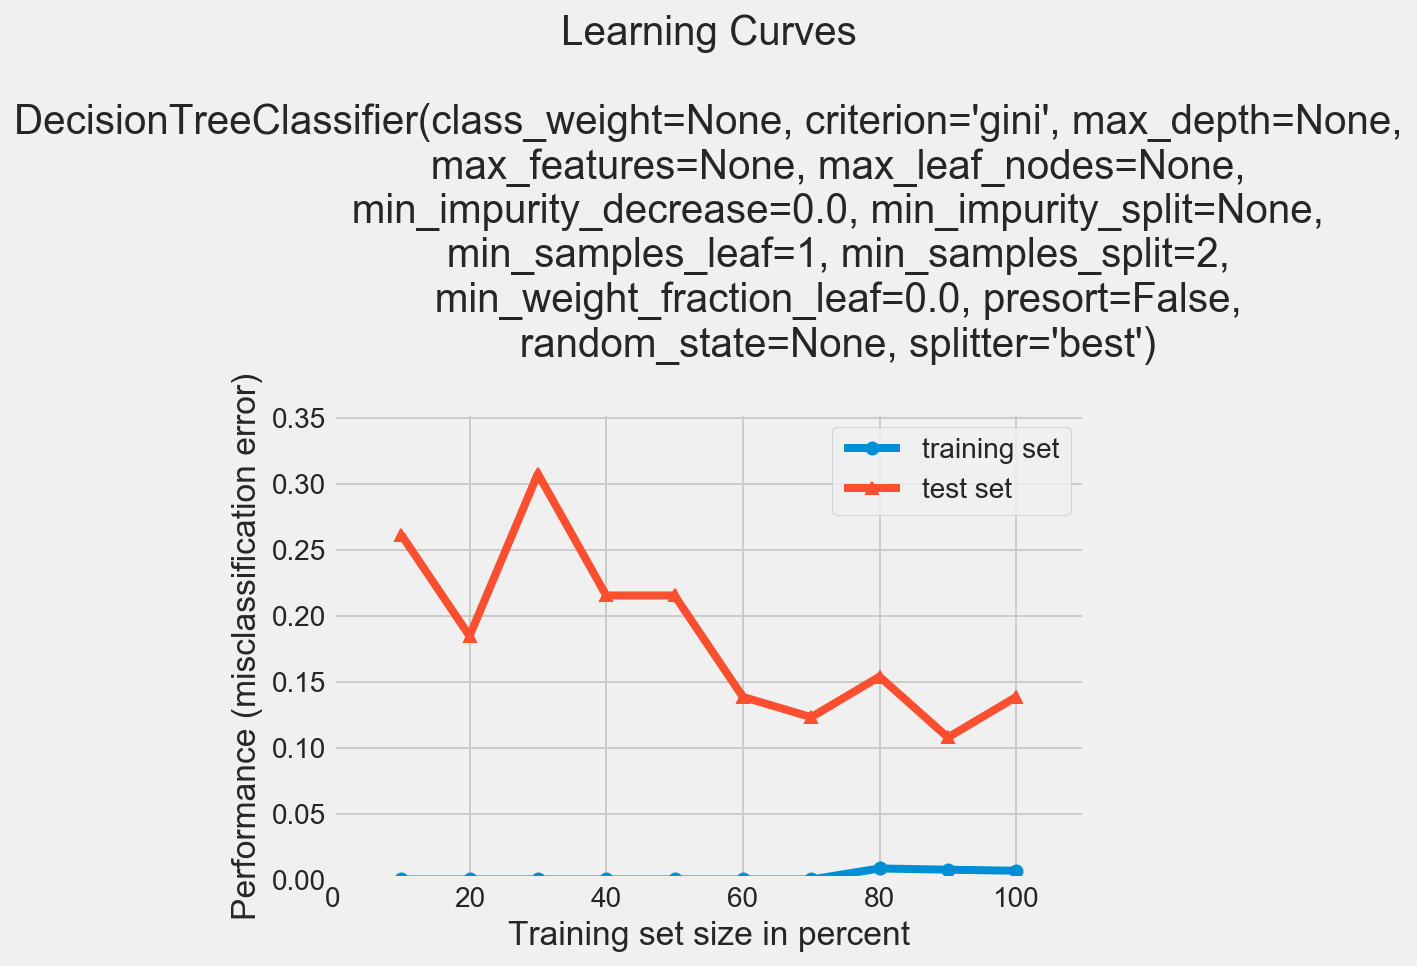

In [587]:

plot_learning_curves(X_train_comparisons_train,y_train_comparisons_train, X_train_comparisons_valid, y_train_comparisons_valid, dtree_comparisons)
plt.show()

Aqui vemos que o erro no conjunto de treinamento começa e permanece extremamente baixo, enquanto o erro no conjunto de teste é grande. Parece que o erro do conjunto de teste está diminuindo lentamente com mais dados. Isso é característico do overfitting, o modelo está capturando exatamente o comportamento dos dados de treinamento, e, portanto, não está conseguindo generalizar para novos pontos.

#### Predicão do dataset de validação

In [588]:

# Predicão do dataset de validação
test_pred = dtree_comparisons.predict(X_tests_comparisons)
# Dataset para apresentação
previsao = X_tests_comparisons.index
previsao.columns=['Id']
previsao = pd.DataFrame(previsao)
previsao['Predicted'] = test_pred
previsao.columns=['Id', 'Predicted']
previsao.reset_index()
previsao.set_index(['Id', 'Predicted'])
previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
#previsao.head(10)
# Contando a predição
previsao.Predicted.value_counts()

# Predicão do dataset de validação
#test_pred = dtree.predict(X_tests_comparisons)
# Dataset para apresentação
#previsao = teste.sequencial_candidato
#previsao = pd.DataFrame(previsao)
#previsao['Predicted'] = test_pred
#previsao.columns=['Id', 'Predicted']
#previsao.reset_index()
#previsao.set_index(['Id', 'Predicted'])
#previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
# Contando a predição
#previsao.Predicted.value_counts()

eleito        19
nao_eleito    17
Name: Predicted, dtype: int64

### MODELO 05 - AdaBoostClassifier

In [591]:
# Biblioteca para o modelo
from sklearn.ensemble import AdaBoostClassifier

In [592]:

# Criando o modelo
ada_comparisons = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1,
                         random_state=0)
# Fitando o modelo
ada_comparisons.fit(X_train_comparisons_train,y_train_comparisons_train)
# Predição
ada_pred_comparisons = ada_comparisons.predict(X_train_comparisons_valid)

Acurácia do modelo: 0.83
Precision: 0.85
F1 do modelo: 0.86
Recall do modelo: 0.87
AUC ROC: 0.82

Relatório de Classificação
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.85      0.87      0.86        38

    accuracy                           0.83        65
   macro avg       0.83      0.82      0.82        65
weighted avg       0.83      0.83      0.83        65


Matriz de confusão
[[21  6]
 [ 5 33]]


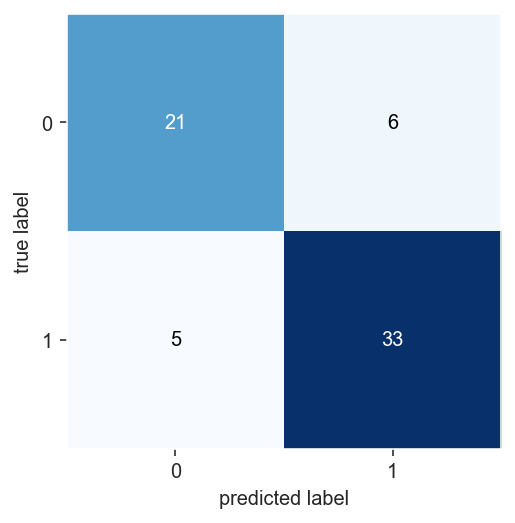

In [593]:
# Acurácia
print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(y_train_comparisons_valid,ada_pred_comparisons),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(y_train_comparisons_valid,ada_pred_comparisons),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(y_train_comparisons_valid,ada_pred_comparisons),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(y_train_comparisons_valid,ada_pred_comparisons),2)))
print(color.BOLD + 'AUC ROC: ' + color.END + str(round(roc_auc_score(y_train_comparisons_valid,ada_pred_comparisons),2)))

# Print do relatório de classificação
cr = classification_report(y_train_comparisons_valid,ada_pred_comparisons)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))

# adicionando resultado na matriz de confusão
cm = confusion_matrix(y_train_comparisons_valid,ada_pred_comparisons)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm)

plt.show()

#### Desempenho treino/teste

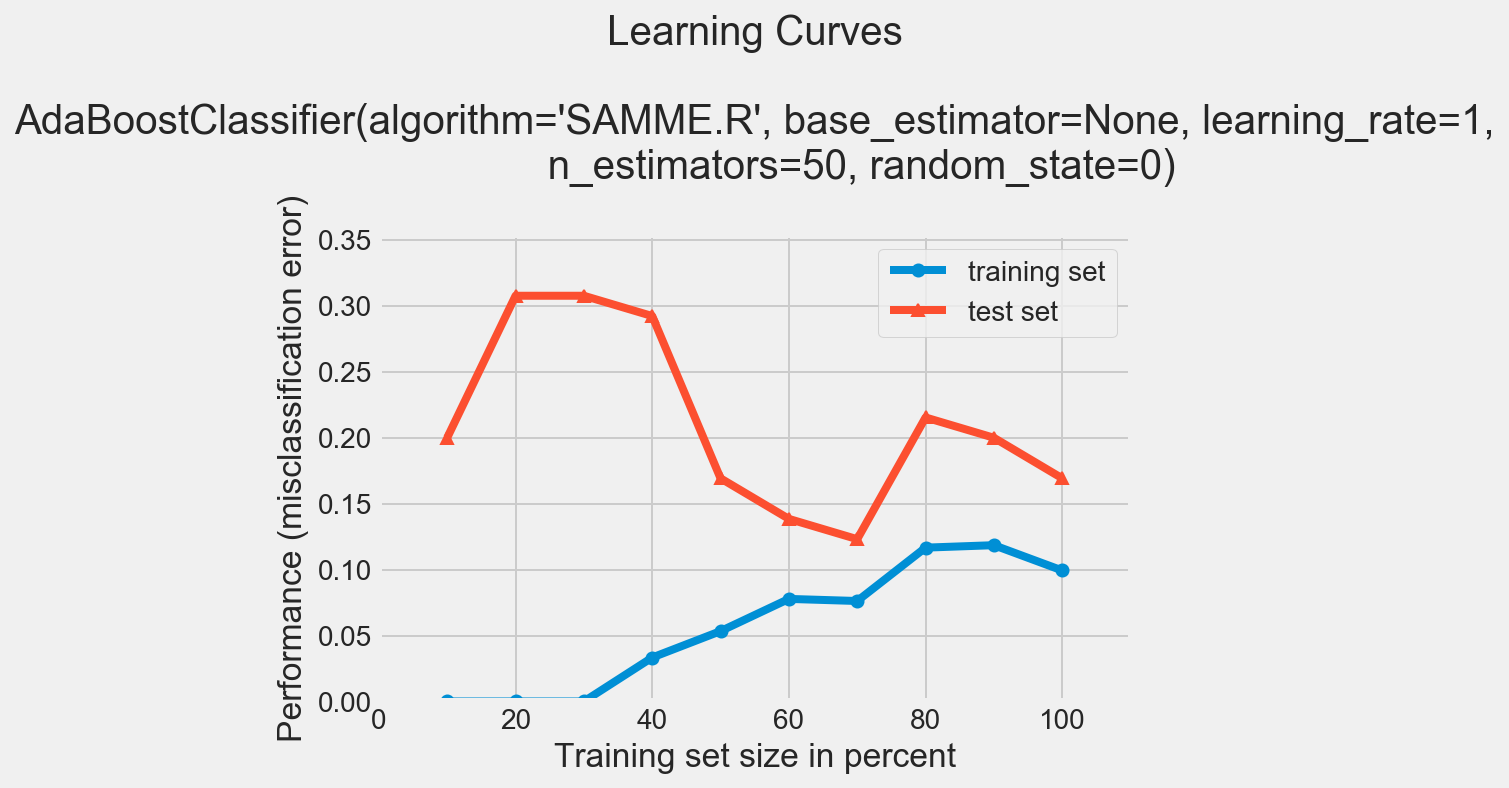

In [594]:

plot_learning_curves(X_train_comparisons_train,y_train_comparisons_train, X_train_comparisons_valid, y_train_comparisons_valid, ada_comparisons)
plt.show()

Após usar todos os dados de treinamento, o modelo está fazendo o mesmo no conjunto de teste e de treinamento - isso significa que não temos overfitting (o modelo generalizou bem). Por outro lado, em termos absolutos, o erro é alto para treinamento e teste. As curvas se achataram muito rapidamente e parece termos aqui underfitting.

#### Predicão do dataset de validação

In [595]:

# Predicão do dataset de validação
test_pred = ada_comparisons.predict(X_tests_comparisons)
# Dataset para apresentação
previsao = X_tests_comparisons.index
previsao.columns=['Id']
previsao = pd.DataFrame(previsao)
previsao['Predicted'] = test_pred
previsao.columns=['Id', 'Predicted']
previsao.reset_index()
previsao.set_index(['Id', 'Predicted'])
previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
#previsao.head(10)
# Contando a predição
previsao.Predicted.value_counts()

# Predicão do dataset de validação
#test_pred = ada.predict(df_valid)
# Dataset para apresentação
#previsao = teste.sequencial_candidato
#previsao = pd.DataFrame(previsao)
#previsao['Predicted'] = test_pred
#previsao.columns=['Id', 'Predicted']
#previsao.reset_index()
#previsao.set_index(['Id', 'Predicted'])
#previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
# Contando a predição
#previsao.Predicted.value_counts()

eleito        20
nao_eleito    16
Name: Predicted, dtype: int64

### MODELO 06 - RandomForestClassifier

In [596]:
# Biblioteca para o modelo
from sklearn.ensemble import RandomForestClassifier

In [597]:

# Criando o modelo
rfc_comparisons = RandomForestClassifier(n_estimators=600)
# Fitando o modelo
rfc_comparisons.fit(X_train_comparisons_train,y_train_comparisons_train)
# Predição
rfc_pred_comparisons = rfc_comparisons.predict(X_train_comparisons_valid)

Acurácia do modelo: 0.91
Precision: 0.9
F1 do modelo: 0.92
Recall do modelo: 0.95
AUC ROC: 0.9

Relatório de Classificação
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.90      0.95      0.92        38

    accuracy                           0.91        65
   macro avg       0.91      0.90      0.90        65
weighted avg       0.91      0.91      0.91        65


Matriz de confusão
[[23  4]
 [ 2 36]]


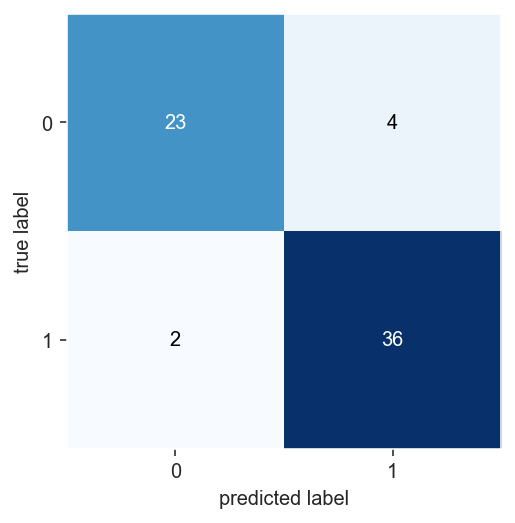

In [598]:
# Acurácia
print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(y_train_comparisons_valid,rfc_pred_comparisons),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(y_train_comparisons_valid,rfc_pred_comparisons),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(y_train_comparisons_valid,rfc_pred_comparisons),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(y_train_comparisons_valid,rfc_pred_comparisons),2)))
print(color.BOLD + 'AUC ROC: ' + color.END + str(round(roc_auc_score(y_train_comparisons_valid,rfc_pred_comparisons),2)))

# Print do relatório de classificação
cr = classification_report(y_train_comparisons_valid,rfc_pred_comparisons)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))

# adicionando resultado na matriz de confusão
cm = confusion_matrix(y_train_comparisons_valid,rfc_pred_comparisons)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm)

plt.show()

#### Desempenho treino/teste

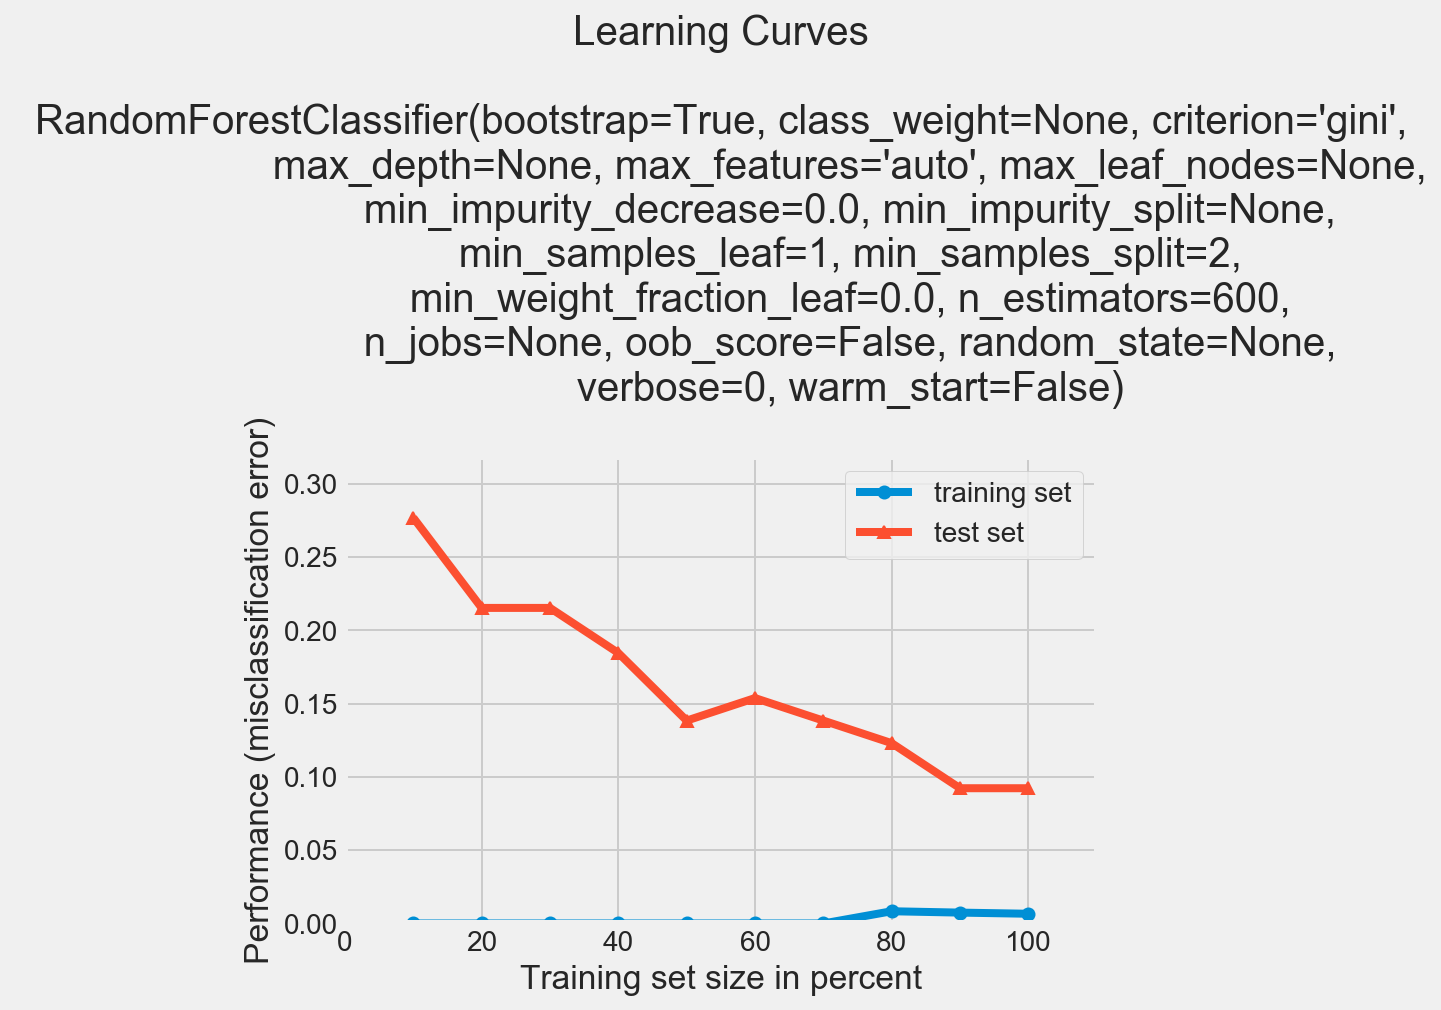

In [599]:

plot_learning_curves(X_train_comparisons_train,y_train_comparisons_train, X_train_comparisons_valid, y_train_comparisons_valid, rfc_comparisons)
plt.show()

Aqui vemos que o erro no conjunto de treinamento começa e permanece extremamente baixo, enquanto o erro no conjunto de teste é grande. Parece que o erro do conjunto de teste está diminuindo lentamente com mais dados. Isso é característico do overfitting, o modelo está capturando exatamente o comportamento dos dados de treinamento, mas, portanto, não está conseguindo generalizar para novos pontos.

#### Predicão do dataset de validação

In [601]:

# Predicão do dataset de validação
test_pred = rfc_comparisons.predict(X_tests_comparisons)
# Dataset para apresentação
previsao = X_tests_comparisons.index
previsao.columns=['Id']
previsao = pd.DataFrame(previsao)
previsao['Predicted'] = test_pred
previsao.columns=['Id', 'Predicted']
previsao.reset_index()
previsao.set_index(['Id', 'Predicted'])
previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
#previsao.head(10)
# Contando a predição
previsao.Predicted.value_counts()

# Predicão do dataset de validação
#test_pred = rfc.predict(df_valid)
# Dataset para apresentação
#previsao = teste.sequencial_candidato
#previsao = pd.DataFrame(previsao)
#previsao['Predicted'] = test_pred
#previsao.columns=['Id', 'Predicted']
#previsao.reset_index()
#previsao.set_index(['Id', 'Predicted'])
#previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
# Contando a predição
#previsao.Predicted.value_counts()

eleito        20
nao_eleito    16
Name: Predicted, dtype: int64

### MODELO 07 - SVM

#### Normalizando os dados com QuantileTransformer

Esse método transforma os recursos para seguir uma distribuição uniforme ou normal. Portanto, para um determinado recurso, essa transformação tende a distribuir os valores mais frequentes. Também reduz o impacto de outliers (marginais): este é, portanto, um esquema robusto de pré-processamento.

In [603]:
from sklearn.preprocessing import QuantileTransformer
# Dimensionando
scaler = QuantileTransformer()
Xqt = X_train_comparisons#X_comparisons
Xqt = scaler.fit_transform(Xqt)


C:\Users\tclem\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (216). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


#### Dividindo os dados em um conjunto de treinamento e conjunto de testes.

In [604]:
# Dividindo os dados em um conjunto de treinamento e conjunto de testes.
from sklearn.model_selection import train_test_split

X_train_comparisons_train, X_train_comparisons_valid, y_train_comparisons_train, y_train_comparisons_valid = train_test_split(Xqt, y_train_comparisons, test_size=0.30,random_state=101)


#X_comparisons_train, X_comparisons_test, y_comparisons_train, y_comparisons_test = train_test_split(Xqt,y_comparisons,test_size=0.30)

In [ ]:
# Dividindo os dados em um conjunto de treinamento e conjunto de testes.
from sklearn.model_selection import train_test_split
X_comparisons_train, X_comparisons_test, y_comparisons_train, y_comparisons_test = train_test_split(X_comparisons,y_comparisons,test_size=0.30)

In [605]:
# Biblioteca para o modelo
from sklearn.svm import SVC

In [606]:

# Criando o modelo
svm = SVC(gamma='scale')
# Fitando o modelo
svm.fit(X_train_comparisons_train,y_train_comparisons_train)
# Predição
svm_pred = svm.predict(X_train_comparisons_valid)

Acurácia do modelo: 0.89
Precision: 0.88
F1 do modelo: 0.91
Recall do modelo: 0.95
AUC ROC: 0.88

Relatório de Classificação
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.88      0.95      0.91        38

    accuracy                           0.89        65
   macro avg       0.90      0.88      0.89        65
weighted avg       0.89      0.89      0.89        65


Matriz de confusão
[[22  5]
 [ 2 36]]


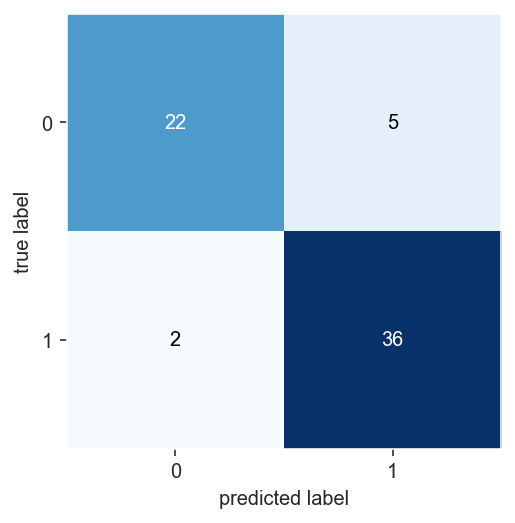

In [607]:
# Acurácia
print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(y_train_comparisons_valid,svm_pred),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(y_train_comparisons_valid,svm_pred),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(y_train_comparisons_valid,svm_pred),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(y_train_comparisons_valid,svm_pred),2)))
print(color.BOLD + 'AUC ROC: ' + color.END + str(round(roc_auc_score(y_train_comparisons_valid,svm_pred),2)))

# Print do relatório de classificação
cr = classification_report(y_train_comparisons_valid,svm_pred)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))

# adicionando resultado na matriz de confusão
cm = confusion_matrix(y_train_comparisons_valid,svm_pred)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm)

plt.show()

#### Desempenho treino/teste

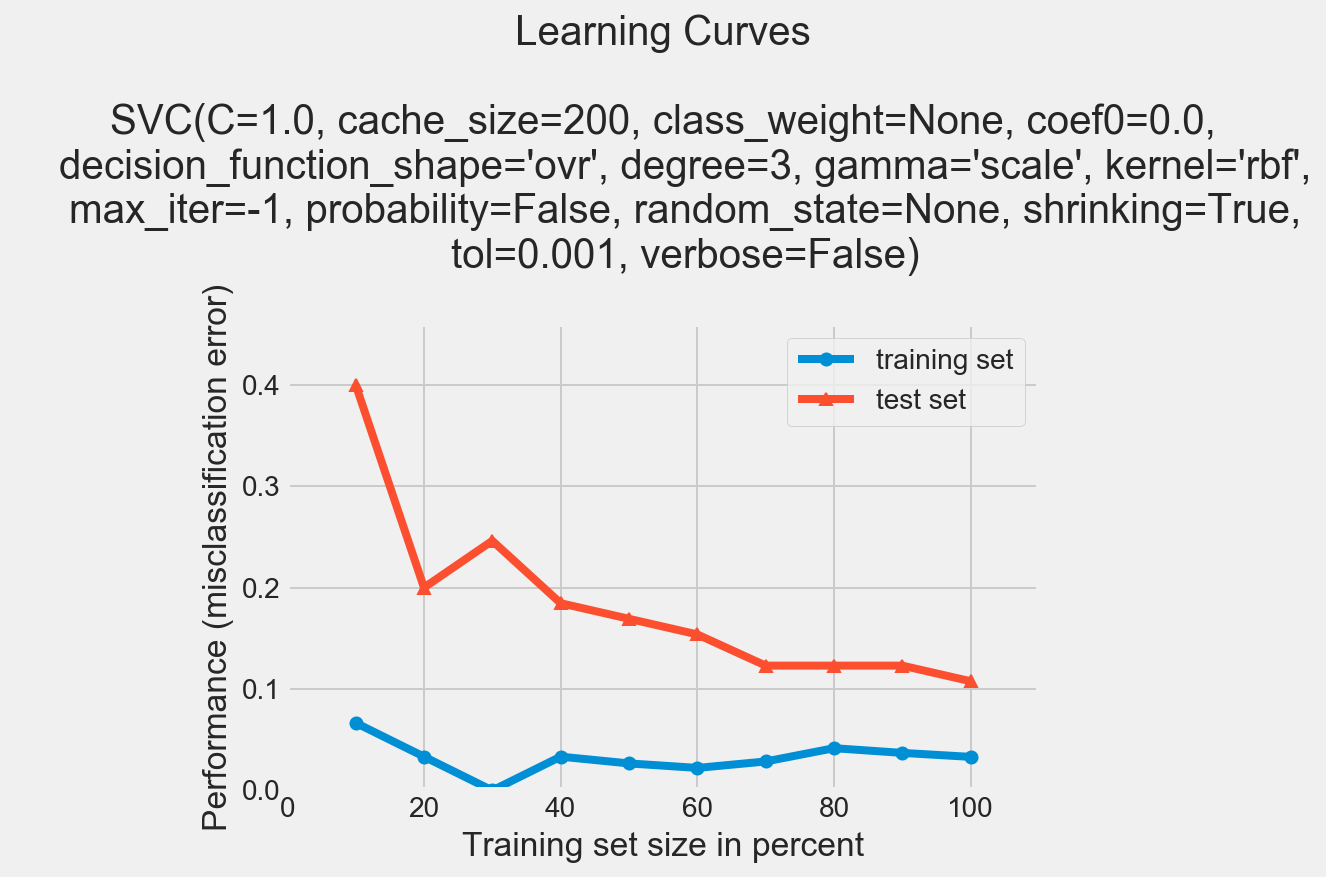

In [608]:

plot_learning_curves(X_train_comparisons_train,y_train_comparisons_train, X_train_comparisons_valid, y_train_comparisons_valid, svm)
plt.show()

O modelo apresenta um comportamento parecido para os dados de treinamento e teste. Seria necessário mais dados de treinamento.

#### Encontrando parâmetro para otimizar o modelo com Gridsearch

O GridSearchCV usa um dicionário que descreve os parâmetros que devem ser testados e um modelo para treinar. A grade de parâmetros é definida como um dicionário, onde as chaves são os parâmetros e os valores são as configurações a serem testadas.

In [609]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 500], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [610]:
from sklearn.model_selection import GridSearchCV

In [611]:

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
grid.fit(X_train_comparisons_train,y_train_comparisons_train)

C:\Users\tclem\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\tclem\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 500],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [612]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [613]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Re-executando as previsões neste objeto da grade

In [614]:
grid_pred = grid.predict(X_train_comparisons_valid)

Acurácia do modelo: 0.88
Precision: 0.86
F1 do modelo: 0.9
Recall do modelo: 0.95
AUC ROC: 0.86

Relatório de Classificação
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.86      0.95      0.90        38

    accuracy                           0.88        65
   macro avg       0.89      0.86      0.87        65
weighted avg       0.88      0.88      0.88        65


Matriz de confusão
[[21  6]
 [ 2 36]]


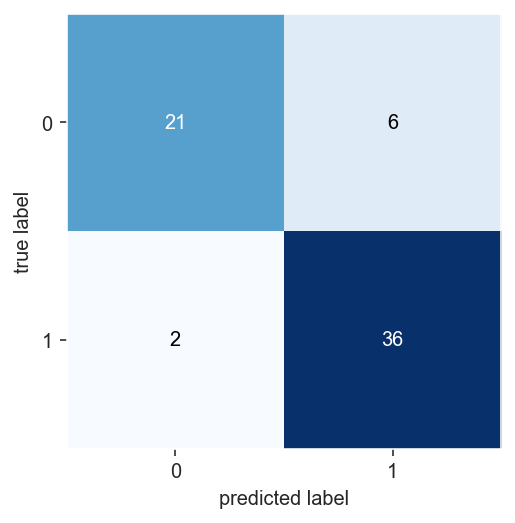

In [615]:
# Acurácia
print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(y_train_comparisons_valid,grid_pred),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(y_train_comparisons_valid,grid_pred),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(y_train_comparisons_valid,grid_pred),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(y_train_comparisons_valid,grid_pred),2)))
print(color.BOLD + 'AUC ROC: ' + color.END + str(round(roc_auc_score(y_train_comparisons_valid,grid_pred),2)))

# Print do relatório de classificação
cr = classification_report(y_train_comparisons_valid,grid_pred)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))

# adicionando resultado na matriz de confusão
cm = confusion_matrix(y_train_comparisons_valid,grid_pred)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm)

plt.show()

In [616]:
# Predicão do dataset de validação
test_pred = grid.predict(X_tests_comparisons)
# Dataset para apresentação
previsao = X_tests_comparisons.index
previsao.columns=['Id']
previsao = pd.DataFrame(previsao)
previsao['Predicted'] = test_pred
previsao.columns=['Id', 'Predicted']
previsao.reset_index()
previsao.set_index(['Id', 'Predicted'])
previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
#previsao.head(10)
# Contando a predição
previsao.Predicted.value_counts()


# Predicão do dataset de validação
#test_pred = grid.predict(XrbT)
# Dataset para apresentação
#previsao = teste.sequencial_candidato
#previsao = pd.DataFrame(previsao)
#previsao['Predicted'] = test_pred
#previsao.columns=['Id', 'Predicted']
#previsao.reset_index()
#previsao.set_index(['Id', 'Predicted'])
#previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
# Contando a predição
#previsao.Predicted.value_counts()

eleito        20
nao_eleito    16
Name: Predicted, dtype: int64

### MODELO 08 - GradientBoosting

In [618]:
from sklearn.model_selection import train_test_split
X_train_comparisons_train, X_train_comparisons_valid, y_train_comparisons_train, y_train_comparisons_valid = train_test_split(X_train_comparisons, y_train_comparisons, test_size=0.30, random_state=101)

In [878]:
from sklearn.ensemble import GradientBoostingClassifier

In [879]:
gb = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100,max_depth=9, min_samples_split=6, 
                                min_samples_leaf=20, subsample=.7,max_features=17, random_state=seed)

In [880]:
#gb = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100,max_depth=9, min_samples_split=6, 
#                                min_samples_leaf=20, subsample=.7,max_features=14, random_state=seed)GridSearchCV(cv='warn', error_score='raise-deprecating',
             
gb = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=4,
                           max_features=6, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=6,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.75, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)





In [881]:
gb.fit(X_train_comparisons_train,y_train_comparisons_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=4,
                           max_features=6, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=6,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.75, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [882]:
gb_pred = gb.predict(X_train_comparisons_valid)

Acurácia do modelo: 0.86
Precision: 0.89
F1 do modelo: 0.88
Recall do modelo: 0.87
AUC ROC: 0.86

Relatório de Classificação
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.89      0.87      0.88        38

    accuracy                           0.86        65
   macro avg       0.86      0.86      0.86        65
weighted avg       0.86      0.86      0.86        65


Matriz de confusão
[[23  4]
 [ 5 33]]


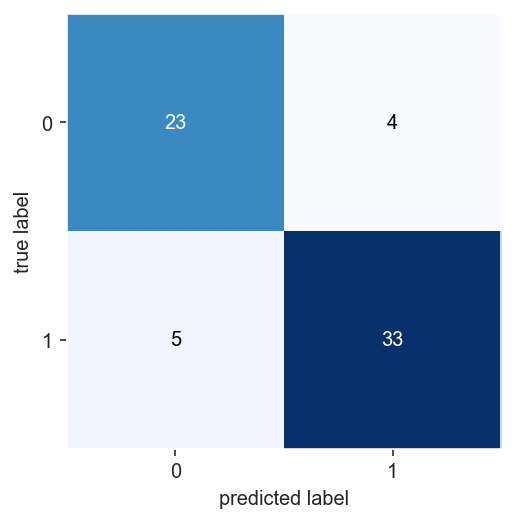

In [883]:
# Acurácia
print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(y_train_comparisons_valid,gb_pred),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(y_train_comparisons_valid,gb_pred),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(y_train_comparisons_valid,gb_pred),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(y_train_comparisons_valid,gb_pred),2)))
print(color.BOLD + 'AUC ROC: ' + color.END + str(round(roc_auc_score(y_train_comparisons_valid,gb_pred),2)))

# Print do relatório de classificação
cr = classification_report(y_train_comparisons_valid,gb_pred)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))

# adicionando resultado na matriz de confusão
cm = confusion_matrix(y_train_comparisons_valid,gb_pred)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm)

plt.show()

#### Desempenho treino/teste

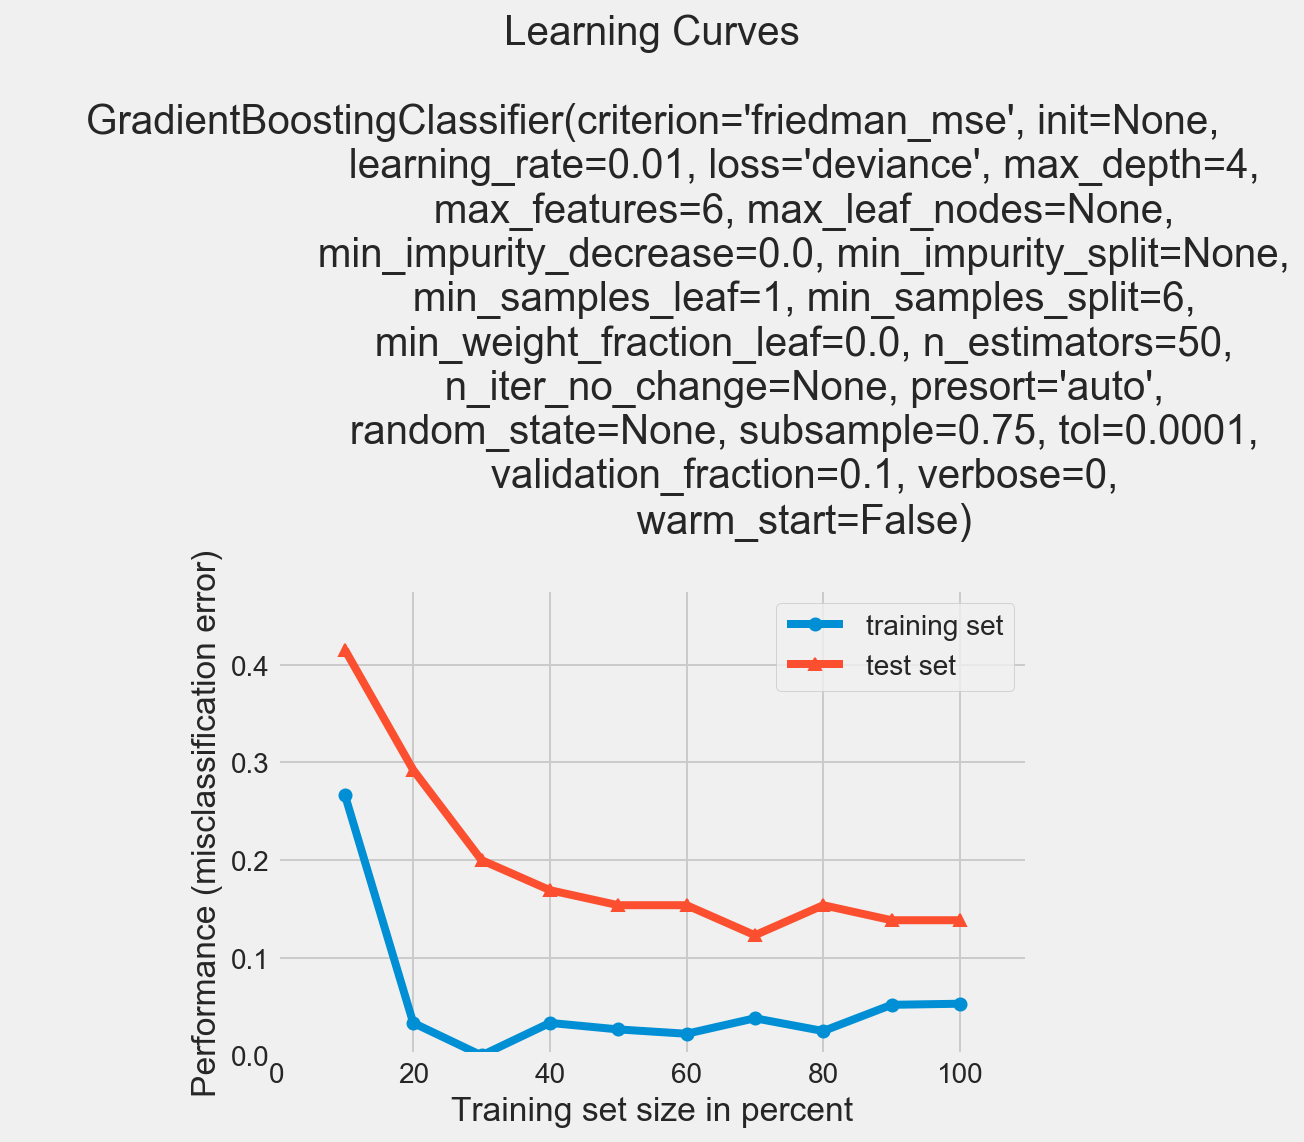

In [884]:
plot_learning_curves(X_train_comparisons_train,y_train_comparisons_train, X_train_comparisons_valid, y_train_comparisons_valid, gb)
plt.show()

Uma curva de aprendizado mostra como o erro muda conforme o tamanho do conjunto de treinamento aumenta. 
Percebemos que a curva de erro vai diminuíndo conforme o tamanho do conjunto de treinamento aumenta.
As curvas não convergiram pois, provavelmente, precisa-se de mais instâncias de treino.
Vemos que que temos um *baixo vies*, pois temos baixo erro no treinamento e uma alta variância devido ao intervalo longo entre as duas curvas.

#### Importância dos atributos

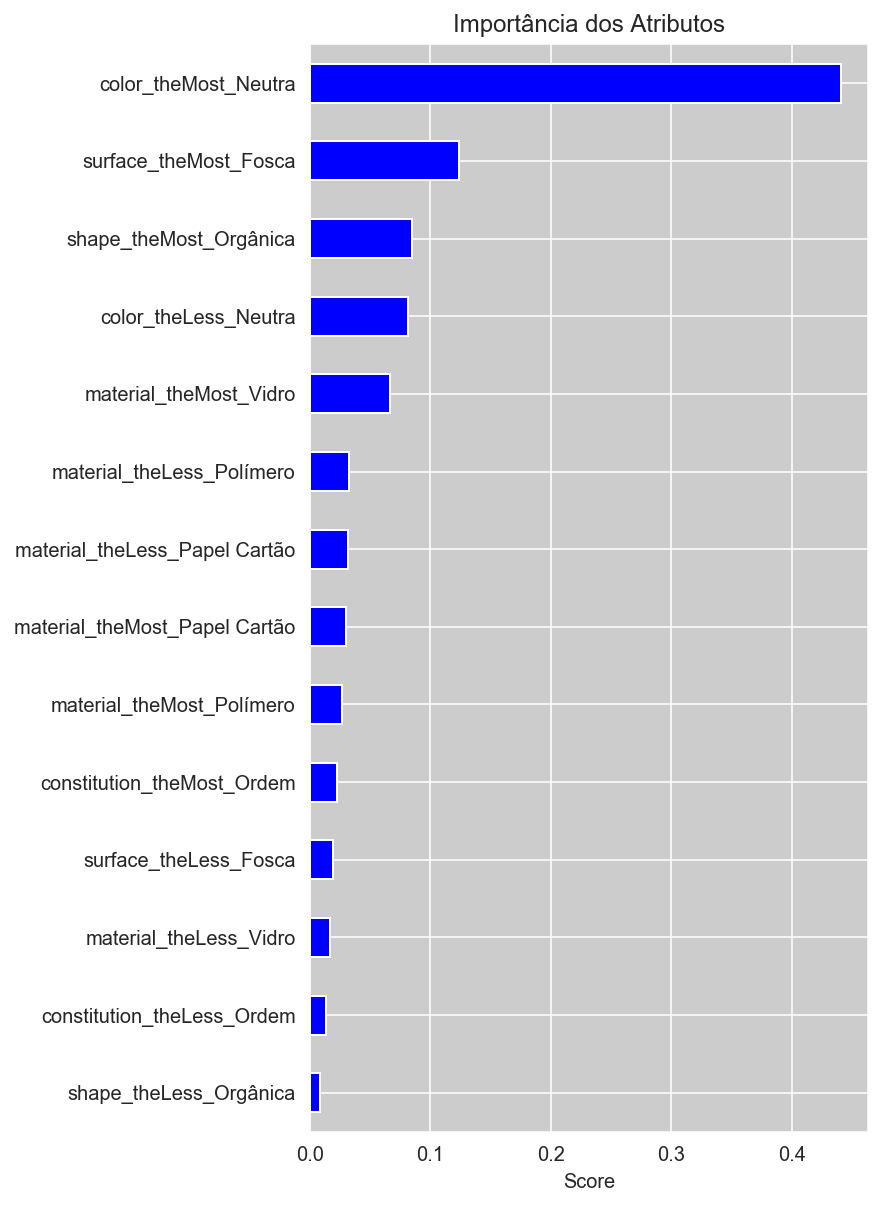

In [849]:
preditores=list(X_train_comparisons_train)
feat_imp = pd.Series(gb.feature_importances_, preditores).sort_values(ascending=False)
# plot
plt.subplots(figsize=(5, 10))                       
feat_imp.head(20).plot(kind='barh', title='Importância dos Atributos', color='blue')
plt.xlabel('Score')
plt.gca().invert_yaxis()

In [886]:
# Predicão do dataset de validação
test_pred = gb.predict(X_tests_comparisons)
# Dataset para apresentação
previsao = X_tests_comparisons.index
previsao.columns=['Id']
previsao = pd.DataFrame(previsao)
previsao['Predicted'] = test_pred
previsao.columns=['Id', 'Predicted']
previsao.reset_index()
previsao.set_index(['Id', 'Predicted'])
previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
#previsao.head(10)
# Contando a predição
previsao.Predicted.value_counts()

# Predicão do dataset de validação
#test_pred = gb.predict(df_valid)
# Dataset para apresentação
#previsao = teste.sequencial_candidato
#previsao = pd.DataFrame(previsao)
#previsao['Predicted'] = test_pred
#previsao.columns=['Id', 'Predicted']
#previsao.reset_index()
#previsao.set_index(['Id', 'Predicted'])
#previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
# Contando a predição
#previsao.Predicted.value_counts()

eleito        19
nao_eleito    17
Name: Predicted, dtype: int64

### MODELO 09 - Ensemble  BaggingClassifier

In [839]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_comparisons, y_comparisons, test_size=0.30, random_state=seed)

In [841]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)

gb = GradientBoostingClassifier(learning_rate=0.01, n_estimators=500,max_depth=2, min_samples_split=20, 
                                      min_samples_leaf=7, subsample=0.9,max_features=7, random_state=10)

num_trees = 100

ens = BaggingClassifier(base_estimator=gb, n_estimators=num_trees, random_state=seed)

In [631]:
# Fitando o modelo
ens.fit(X_train_comparisons_train, y_train_comparisons_train)

BaggingClassifier(base_estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                            init=None,
                                                            learning_rate=0.01,
                                                            loss='deviance',
                                                            max_depth=2,
                                                            max_features=7,
                                                            max_leaf_nodes=None,
                                                            min_impurity_decrease=0.0,
                                                            min_impurity_split=None,
                                                            min_samples_leaf=7,
                                                            min_samples_split=20,
                                                            min_weight_fraction_leaf=0.0,
                                

In [632]:
# Predições
ens_pred = ens.predict(X_train_comparisons_valid)

Acurácia do modelo: 0.89
Precision: 0.88
F1 do modelo: 0.91
Recall do modelo: 0.95
AUC ROC: 0.88

Relatório de Classificação
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.88      0.95      0.91        38

    accuracy                           0.89        65
   macro avg       0.90      0.88      0.89        65
weighted avg       0.89      0.89      0.89        65


Matriz de confusão
[[22  5]
 [ 2 36]]


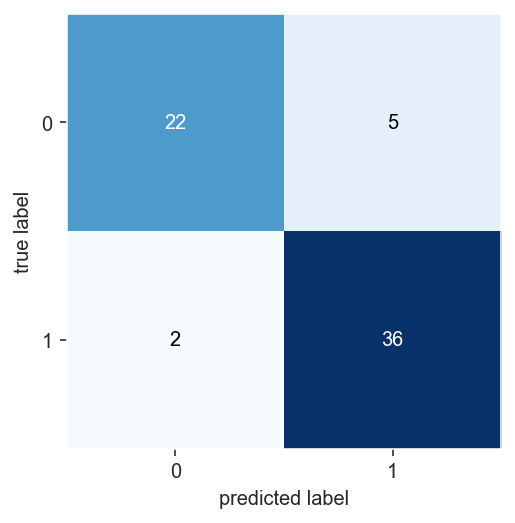

In [633]:
# Acurácia
print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(y_train_comparisons_valid,ens_pred),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(y_train_comparisons_valid,ens_pred),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(y_train_comparisons_valid,ens_pred),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(y_train_comparisons_valid,ens_pred),2)))
print(color.BOLD + 'AUC ROC: ' + color.END + str(round(roc_auc_score(y_train_comparisons_valid,ens_pred),2)))

# Print do relatório de classificação
cr = classification_report(y_train_comparisons_valid,ens_pred)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))

# adicionando resultado na matriz de confusão
cm = confusion_matrix(y_train_comparisons_valid,ens_pred)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm)

plt.show()

#### Desempenho treino/teste

In [634]:
plot_learning_curves(X_train_comparisons_train,y_train_comparisons_train, X_train_comparisons_valid, y_train_comparisons_valid, ens)
plt.show()

C:\Users\tclem\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:608: RuntimeWarning: divide by zero encountered in double_scalars
  return (-2 / sample_weight.sum() * np.sum(
C:\Users\tclem\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:610: RuntimeWarning: invalid value encountered in double_scalars
  np.logaddexp(0, raw_predictions))))
C:\Users\tclem\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:608: RuntimeWarning: divide by zero encountered in double_scalars
  return (-2 / sample_weight.sum() * np.sum(
C:\Users\tclem\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:610: RuntimeWarning: invalid value encountered in double_scalars
  np.logaddexp(0, raw_predictions))))
C:\Users\tclem\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:608: RuntimeWarning: divide by zero encountered in double_scalars
  return (-2 / sample_weight.sum() * np.sum(
C:\Users\tclem\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:610: RuntimeWarni

ValueError: y contains 1 class after sample_weight trimmed classes with zero weights, while a minimum of 2 classes are required.

O  modelo parece ter generalizado bem, mas com o aumento do tamanho do conjunto de treinamento vemos que o erro, mesmo sendo baixo, vai crescendo.

#### Predicão do dataset de validação

In [635]:
# Predicão do dataset de validação
test_pred = ens.predict(X_tests_comparisons)
# Dataset para apresentação
previsao = X_tests_comparisons.index
previsao.columns=['Id']
previsao = pd.DataFrame(previsao)
previsao['Predicted'] = test_pred
previsao.columns=['Id', 'Predicted']
previsao.reset_index()
previsao.set_index(['Id', 'Predicted'])
previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
#previsao.head(10)
# Contando a predição
previsao.Predicted.value_counts()


# Predicão do dataset de validação
#test_pred = ens.predict(df_valid)
# Dataset para apresentação
#previsao = teste.sequencial_candidato
#previsao = pd.DataFrame(previsao)
#previsao['Predicted'] = test_pred
#previsao.columns=['Id', 'Predicted']
#previsao.reset_index()
#previsao.set_index(['Id', 'Predicted'])
#previsao['Predicted'] = np.where(previsao['Predicted']==1, 'eleito','nao_eleito')
# Salvando dataset
#previsao.to_csv('predicoes/predicted_ens_tunning.csv', index=False)
# Contando a predição
#previsao.Predicted.value_counts()

nao_eleito    36
Name: Predicted, dtype: int64

#### OBSERVAÇÕES

Os parâmetros utilizados no GradientBoostingClassifier foram obtidos entre as melhores combinações feitas através do GridSearch que foi interrompido devido ao tempo que levaria para finalizar.
Entres as combinações a com melhor score foi:

[CV]  learning_rate=0.01, max_depth=2, max_features=7, min_samples_leaf=7, min_samples_split=20, n_estimators=500, subsample=0.9, score=0.9251968503937008, total=   0.7s

##### Parâmetros utilizados no GridSearch
    param_grid = {'learning_rate':[0.01,0.05,0.1], 'n_estimators':[50,100,250,500],
              'max_depth':[2,3,4,5,7,9], 'min_samples_split':[2,4,6,8,10,20,40,60,100], 
              'min_samples_leaf':[1,3,5,7,9],'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1],
             'max_features':[2,3,4,5,6,7]} 
             
             
###### GridSearch

    from sklearn.model_selection import GridSearchCV
    grid = GridSearchCV(GradientBoostingClassifier(),param_grid,refit=True,verbose=3)
    grid.fit(X_train,y_train)

In [ ]:
param_grid = {'learning_rate':[0.01,0.05,0.1], 'n_estimators':[50,100,250,500],
              'max_depth':[2,3,4,5,7,9], 'min_samples_split':[2,4,6,8,10,20,40,60,100], 
              'min_samples_leaf':[1,3,5,7,9],'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1],
              'max_features':[2,3,4,5,6,7]} 

In [ ]:
from sklearn.model_selection import GridSearchCV


grid = GridSearchCV(GradientBoostingClassifier(),param_grid,refit=True,verbose=3)
grid.fit(X_train_comparisons_train,y_train_comparisons_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
grid_pred = grid.predict(X_train_comparisons_valid)

In [ ]:
# Acurácia
print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(X_train_comparisons_valid,grid_pred),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(X_train_comparisons_valid,grid_pred),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(X_train_comparisons_valid,grid_pred),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(X_train_comparisons_valid,grid_pred),2)))
print(color.BOLD + 'AUC ROC: ' + color.END + str(round(roc_auc_score(X_train_comparisons_valid,grid_pred),2)))

# Print do relatório de classificação
cr = classification_report(X_train_comparisons_valid,grid_pred)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))

# adicionando resultado na matriz de confusão
cm = confusion_matrix(X_train_comparisons_valid,grid_pred)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm)

plt.show()

#### Predição Pontual

In [636]:
gb_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [637]:
X_train_comparisons_train

,,shape_theLess_Orgânica,material_theLess_Papel Cartão,material_theLess_Polímero,material_theLess_Vidro,surface_theLess_Fosca,color_theLess_Neutra,constitution_theLess_Ordem,shape_theMost_Orgânica,material_theMost_Papel Cartão,material_theMost_Polímero,material_theMost_Vidro,surface_theMost_Fosca,color_theMost_Neutra,constitution_theMost_Ordem
theMost,theLess,,,,,,,,,,,,,,
https://drive.google.com/uc?export=view&id=1_2if1BxHQvLhvXGcU7qPxtlr8_xKAM02,https://drive.google.com/uc?export=view&id=1IZ1g7riF0ceNT9lDn3PE9HezBciuiFYr,1,0,0,0,1,0,0,1,0,0,1,1,0,1
https://drive.google.com/uc?export=view&id=1EEoy5MeYhOUKHledvLYolZ2rEGj2XLw_,https://drive.google.com/uc?export=view&id=1251JyFUZb-yeKRiV2kCg6oXhEt2ImZvT,0,1,0,0,0,1,0,1,0,1,0,1,1,1
https://drive.google.com/uc?export=view&id=19Wknw7VwM0X0QD1wgcvhznvFDZfWHCtv,https://drive.google.com/uc?export=view&id=1pQGvgvUg2Aot1XrKTpLiBJSvgllbN7Nb,1,0,0,0,0,0,0,1,0,1,0,1,1,0
https://drive.google.com/uc?export=view&id=1KoqUARhB9y0gYZHitZVHI2mj5KokUCH0,https://drive.google.com/uc?export=view&id=18BVQ5i2pYlYG3dUk2a0vIg7BuLSZ1gzy,0,0,0,0,0,0,0,0,0,0,0,0,1,0
https://drive.google.com/uc?export=view&id=1hwIG7voqAtG8Kpt3ntnhrPeZqjksG0ho,https://drive.google.com/uc?export=view&id=1RQpLGRE6eq_jwPePnRe9ANi3Qqk_kXAj,0,1,0,0,1,1,0,1,0,0,1,1,1,1
https://drive.google.com/uc?export=view&id=1pQGvgvUg2Aot1XrKTpLiBJSvgllbN7Nb,https://drive.google.com/uc?export=view&id=19Wknw7VwM0X0QD1wgcvhznvFDZfWHCtv,1,0,1,0,1,1,0,1,0,0,0,0,0,0
https://drive.google.com/uc?export=view&id=1_wAdlyLg-5u0soRpGgo3eV8zlHN-GK_2,https://drive.google.com/uc?export=view&id=1nM-gmFyh1DehD2-NpMu9CaNV_EAoXuSa,1,0,1,0,1,0,1,0,0,0,0,1,0,0
https://drive.google.com/uc?export=view&id=1RhsOgqTgJ91jrswL0TTXPtckzrk-h3hN,https://drive.google.com/uc?export=view&id=1wFYltt2_MY8dvqYmr4uNXmyxACR5_z3H,0,0,1,0,1,0,0,1,0,0,0,1,0,1
https://drive.google.com/uc?export=view&id=10Jz41XbCkiTT3Qnlsyf-Mn-5WZ9phuuR,https://drive.google.com/uc?export=view&id=1B5tlzA_VIuYKSeDugKnMG3K8ck_3WEdA,0,0,0,1,0,0,1,0,0,0,0,1,1,0


In [205]:
print(y_train_comparisons_train)

https://drive.google.com/uc?export=view&id=1IZ1g7riF0ceNT9lDn3PE9HezBciuiFYr    0
https://drive.google.com/uc?export=view&id=1251JyFUZb-yeKRiV2kCg6oXhEt2ImZvT    1
https://drive.google.com/uc?export=view&id=1pQGvgvUg2Aot1XrKTpLiBJSvgllbN7Nb    1
https://drive.google.com/uc?export=view&id=18BVQ5i2pYlYG3dUk2a0vIg7BuLSZ1gzy    1
https://drive.google.com/uc?export=view&id=1RQpLGRE6eq_jwPePnRe9ANi3Qqk_kXAj    1
                                                                               ..
https://drive.google.com/uc?export=view&id=1DEj5TPK5AvwSs3PHjZw1imeoFOkO6_dH    1
https://drive.google.com/uc?export=view&id=1EEoy5MeYhOUKHledvLYolZ2rEGj2XLw_    0
https://drive.google.com/uc?export=view&id=1IZ1g7riF0ceNT9lDn3PE9HezBciuiFYr    1
https://drive.google.com/uc?export=view&id=1251JyFUZb-yeKRiV2kCg6oXhEt2ImZvT    1
https://drive.google.com/uc?export=view&id=1KoqUARhB9y0gYZHitZVHI2mj5KokUCH0    0
Name: result, Length: 151, dtype: int32


In [669]:
X_train_comparisons_train

,,shape_theLess_Orgânica,material_theLess_Papel Cartão,material_theLess_Polímero,material_theLess_Vidro,surface_theLess_Fosca,color_theLess_Neutra,constitution_theLess_Ordem,shape_theMost_Orgânica,material_theMost_Papel Cartão,material_theMost_Polímero,material_theMost_Vidro,surface_theMost_Fosca,color_theMost_Neutra,constitution_theMost_Ordem
theMost,theLess,,,,,,,,,,,,,,
https://drive.google.com/uc?export=view&id=1_2if1BxHQvLhvXGcU7qPxtlr8_xKAM02,https://drive.google.com/uc?export=view&id=1IZ1g7riF0ceNT9lDn3PE9HezBciuiFYr,1,0,0,0,1,0,0,1,0,0,1,1,0,1
https://drive.google.com/uc?export=view&id=1EEoy5MeYhOUKHledvLYolZ2rEGj2XLw_,https://drive.google.com/uc?export=view&id=1251JyFUZb-yeKRiV2kCg6oXhEt2ImZvT,0,1,0,0,0,1,0,1,0,1,0,1,1,1
https://drive.google.com/uc?export=view&id=19Wknw7VwM0X0QD1wgcvhznvFDZfWHCtv,https://drive.google.com/uc?export=view&id=1pQGvgvUg2Aot1XrKTpLiBJSvgllbN7Nb,1,0,0,0,0,0,0,1,0,1,0,1,1,0
https://drive.google.com/uc?export=view&id=1KoqUARhB9y0gYZHitZVHI2mj5KokUCH0,https://drive.google.com/uc?export=view&id=18BVQ5i2pYlYG3dUk2a0vIg7BuLSZ1gzy,0,0,0,0,0,0,0,0,0,0,0,0,1,0
https://drive.google.com/uc?export=view&id=1hwIG7voqAtG8Kpt3ntnhrPeZqjksG0ho,https://drive.google.com/uc?export=view&id=1RQpLGRE6eq_jwPePnRe9ANi3Qqk_kXAj,0,1,0,0,1,1,0,1,0,0,1,1,1,1
https://drive.google.com/uc?export=view&id=1pQGvgvUg2Aot1XrKTpLiBJSvgllbN7Nb,https://drive.google.com/uc?export=view&id=19Wknw7VwM0X0QD1wgcvhznvFDZfWHCtv,1,0,1,0,1,1,0,1,0,0,0,0,0,0
https://drive.google.com/uc?export=view&id=1_wAdlyLg-5u0soRpGgo3eV8zlHN-GK_2,https://drive.google.com/uc?export=view&id=1nM-gmFyh1DehD2-NpMu9CaNV_EAoXuSa,1,0,1,0,1,0,1,0,0,0,0,1,0,0
https://drive.google.com/uc?export=view&id=1RhsOgqTgJ91jrswL0TTXPtckzrk-h3hN,https://drive.google.com/uc?export=view&id=1wFYltt2_MY8dvqYmr4uNXmyxACR5_z3H,0,0,1,0,1,0,0,1,0,0,0,1,0,1
https://drive.google.com/uc?export=view&id=10Jz41XbCkiTT3Qnlsyf-Mn-5WZ9phuuR,https://drive.google.com/uc?export=view&id=1B5tlzA_VIuYKSeDugKnMG3K8ck_3WEdA,0,0,0,1,0,0,1,0,0,0,0,1,1,0


In [245]:
#def compare_to_others(comparisons, uRL):
packagings.loc[packagings['URL'] == 'https://drive.google.com/uc?export=view&id=1IZ1g7riF0ceNT9lDn3PE9HezBciuiFYr']

,id,URL,shape,material,surface,color,constitution
27,36,https://drive.google.com/uc?export=view&id=1IZ...,Orgânica,Metal,Fosca,Intensa,Complexidade


In [449]:
packagings.loc[packagings['URL'] == 'https://drive.google.com/uc?export=view&id=1MynYnnCIiYnM7WTrnAIrNNpmrmQ7Vvvm']

,id,URL,shape,material,surface,color,constitution
46,17,https://drive.google.com/uc?export=view&id=1My...,Geométrica,Polímero,Brilhosa,Intensa,Ordem


In [670]:

X_train_comparisons_train.loc[pd.IndexSlice[:,['https://drive.google.com/uc?export=view&id=14UQ8tJzAvLGTNP0KiJrEbsuQTxAJcuvn']], :]#.loc[[('https://drive.google.com/uc?export=view&id=13tAw6SGyLpVb1vAoxduCwxrfKu2yibwJ','https://drive.google.com/uc?export=view&id=14UQ8tJzAvLGTNP0KiJrEbsuQTxAJcuvn')]] 

,,shape_theLess_Orgânica,material_theLess_Papel Cartão,material_theLess_Polímero,material_theLess_Vidro,surface_theLess_Fosca,color_theLess_Neutra,constitution_theLess_Ordem,shape_theMost_Orgânica,material_theMost_Papel Cartão,material_theMost_Polímero,material_theMost_Vidro,surface_theMost_Fosca,color_theMost_Neutra,constitution_theMost_Ordem
theMost,theLess,,,,,,,,,,,,,,
https://drive.google.com/uc?export=view&id=18D-a2wgiQxg2blRghVploCq-_0-fsLrm,https://drive.google.com/uc?export=view&id=14UQ8tJzAvLGTNP0KiJrEbsuQTxAJcuvn,1,0,1,0,0,0,0,1,0,0,1,0,0,0
https://drive.google.com/uc?export=view&id=1pQGvgvUg2Aot1XrKTpLiBJSvgllbN7Nb,https://drive.google.com/uc?export=view&id=14UQ8tJzAvLGTNP0KiJrEbsuQTxAJcuvn,1,0,1,0,0,0,0,1,0,0,0,0,0,0
https://drive.google.com/uc?export=view&id=1_2if1BxHQvLhvXGcU7qPxtlr8_xKAM02,https://drive.google.com/uc?export=view&id=14UQ8tJzAvLGTNP0KiJrEbsuQTxAJcuvn,1,0,1,0,0,0,0,1,0,0,1,1,0,1
https://drive.google.com/uc?export=view&id=1Em-E9q1uIYChvbzy4q9eRh3vJ2DpUfOo,https://drive.google.com/uc?export=view&id=14UQ8tJzAvLGTNP0KiJrEbsuQTxAJcuvn,1,0,1,0,0,0,0,1,0,1,0,1,0,0
https://drive.google.com/uc?export=view&id=1HxIdENINkoIAYH-c0Ib-o3J8UYxqXXyh,https://drive.google.com/uc?export=view&id=14UQ8tJzAvLGTNP0KiJrEbsuQTxAJcuvn,1,0,1,0,0,0,0,1,0,0,0,1,1,0
https://drive.google.com/uc?export=view&id=1B5tlzA_VIuYKSeDugKnMG3K8ck_3WEdA,https://drive.google.com/uc?export=view&id=14UQ8tJzAvLGTNP0KiJrEbsuQTxAJcuvn,1,0,1,0,0,0,0,0,0,0,1,0,0,1


In [671]:
X_train_comparisons_train.loc[pd.IndexSlice[['https://drive.google.com/uc?export=view&id=14UQ8tJzAvLGTNP0KiJrEbsuQTxAJcuvn'],:], :]

,,shape_theLess_Orgânica,material_theLess_Papel Cartão,material_theLess_Polímero,material_theLess_Vidro,surface_theLess_Fosca,color_theLess_Neutra,constitution_theLess_Ordem,shape_theMost_Orgânica,material_theMost_Papel Cartão,material_theMost_Polímero,material_theMost_Vidro,surface_theMost_Fosca,color_theMost_Neutra,constitution_theMost_Ordem
theMost,theLess,,,,,,,,,,,,,,


In [672]:
X_train_comparisons_train.columns

Index(['shape_theLess_Orgânica', 'material_theLess_Papel Cartão',
       'material_theLess_Polímero', 'material_theLess_Vidro',
       'surface_theLess_Fosca', 'color_theLess_Neutra',
       'constitution_theLess_Ordem', 'shape_theMost_Orgânica',
       'material_theMost_Papel Cartão', 'material_theMost_Polímero',
       'material_theMost_Vidro', 'surface_theMost_Fosca',
       'color_theMost_Neutra', 'constitution_theMost_Ordem'],
      dtype='object')

In [834]:
packagings.columns
packaging_test = packagings.copy()#.loc[11:11]#aleatório

packaging_test.columns = packaging_test.columns.str.cat(["_theMost" if x != 'id' and x != 'URL' else "" for x in packaging_test.columns], sep ="")

#packaging_tests = packagings.loc[packagings['URL'] != packaging_test['URL'], 'URL']

packaging_tests = packagings.copy()#.drop(11,axis=0)#aleatório
packaging_tests

,id,URL,shape,material,surface,color,constitution
0,63,https://drive.google.com/uc?export=view&id=1hw...,Orgânica,Vidro,Fosca,Neutra,Ordem
1,62,https://drive.google.com/uc?export=view&id=1V6...,Orgânica,Vidro,Fosca,Neutra,Complexidade
2,61,https://drive.google.com/uc?export=view&id=1_2...,Orgânica,Vidro,Fosca,Intensa,Ordem
3,60,https://drive.google.com/uc?export=view&id=1vz...,Orgânica,Vidro,Fosca,Intensa,Complexidade
4,59,https://drive.google.com/uc?export=view&id=12X...,Orgânica,Vidro,Brilhosa,Neutra,Ordem
5,58,https://drive.google.com/uc?export=view&id=1im...,Orgânica,Vidro,Brilhosa,Neutra,Complexidade
6,57,https://drive.google.com/uc?export=view&id=1AI...,Orgânica,Vidro,Brilhosa,Intensa,Ordem
7,56,https://drive.google.com/uc?export=view&id=18D...,Orgânica,Vidro,Brilhosa,Intensa,Complexidade
8,55,https://drive.google.com/uc?export=view&id=1EE...,Orgânica,Polímero,Fosca,Neutra,Ordem
9,54,https://drive.google.com/uc?export=view&id=19W...,Orgânica,Polímero,Fosca,Neutra,Complexidade


In [835]:
#packaging_tests = packagings.loc[packagings[:,'URL'] != packaging_test[:,['URL']]]

#[elem for elem in tasks if tasks[:1] in [elem[:,['url_first']]] ]

packaging_tests.columns = packaging_tests.columns.str.cat(["_theLess" if x != 'id' and x != 'URL' else "" for x in packaging_tests.columns], sep ="")

packaging_tests = packaging_tests.drop(['id','URL'],axis=1)
packaging_test = packaging_test.drop(['id','URL'],axis=1)

packaging_tests_2 = pd.get_dummies(packaging_tests[['shape_theLess', 'material_theLess', 'surface_theLess', 'color_theLess', 
                                          'constitution_theLess']], drop_first=True)

packaging_test_2 = pd.get_dummies(packaging_test[['shape_theMost', 'material_theMost', 'surface_theMost', 'color_theMost', 
                                          'constitution_theMost']], drop_first=True)

packaging_test_2 = packaging_test_2.loc[11:11]#aleatório
packaging_tests_2 = packaging_tests_2.drop(11,axis=0)#aleatório

packaging_test_3 = packaging_test_2
for i in range(len(packaging_tests_2)-1):
    packaging_test_3 = packaging_test_3.append(packaging_test_2)

packaging = pd.concat([packaging_tests_2.reset_index(drop=True),packaging_test_3.reset_index(drop=True)],axis=1)

packaging

,shape_theLess_Orgânica,material_theLess_Papel Cartão,material_theLess_Polímero,material_theLess_Vidro,surface_theLess_Fosca,color_theLess_Neutra,constitution_theLess_Ordem,shape_theMost_Orgânica,material_theMost_Papel Cartão,material_theMost_Polímero,material_theMost_Vidro,surface_theMost_Fosca,color_theMost_Neutra,constitution_theMost_Ordem
0,1,0,0,1,1,1,1,1,0,1,0,1,0,0
1,1,0,0,1,1,1,0,1,0,1,0,1,0,0
2,1,0,0,1,1,0,1,1,0,1,0,1,0,0
3,1,0,0,1,1,0,0,1,0,1,0,1,0,0
4,1,0,0,1,0,1,1,1,0,1,0,1,0,0
5,1,0,0,1,0,1,0,1,0,1,0,1,0,0
6,1,0,0,1,0,0,1,1,0,1,0,1,0,0
7,1,0,0,1,0,0,0,1,0,1,0,1,0,0
8,1,0,1,0,1,1,1,1,0,1,0,1,0,0
9,1,0,1,0,1,1,0,1,0,1,0,1,0,0


In [827]:
#packaging_2 = pd.get_dummies(packaging[['shape_theLess', 'material_theLess', 'surface_theLess', 'color_theLess', 
#                                          'constitution_theLess', 'shape_theMost', 'material_theMost', 'surface_theMost', 'color_theMost', 
#                                          'constitution_theMost']], drop_first=True)

In [838]:
(set(X_train_comparisons_train.columns) - (set(packaging.columns)))

set()

In [851]:
gb_pred = gb.predict(packaging)

In [852]:
sum(gb_pred[:])/len(gb_pred)

0.49206349206349204

In [862]:
packagings.loc[11:11]

,id,URL,shape,material,surface,color,constitution
11,52,https://drive.google.com/uc?export=view&id=1Em...,Orgânica,Polímero,Fosca,Intensa,Complexidade


In [867]:
X_train_comparisons_train.loc[pd.IndexSlice[:,['https://drive.google.com/uc?export=view&id=1Em-E9q1uIYChvbzy4q9eRh3vJ2DpUfOo']], :]

,,shape_theLess_Orgânica,material_theLess_Papel Cartão,material_theLess_Polímero,material_theLess_Vidro,surface_theLess_Fosca,color_theLess_Neutra,constitution_theLess_Ordem,shape_theMost_Orgânica,material_theMost_Papel Cartão,material_theMost_Polímero,material_theMost_Vidro,surface_theMost_Fosca,color_theMost_Neutra,constitution_theMost_Ordem
theMost,theLess,,,,,,,,,,,,,,
https://drive.google.com/uc?export=view&id=1B5tlzA_VIuYKSeDugKnMG3K8ck_3WEdA,https://drive.google.com/uc?export=view&id=1Em-E9q1uIYChvbzy4q9eRh3vJ2DpUfOo,1,0,1,0,1,0,0,0,0,0,1,0,0,1
https://drive.google.com/uc?export=view&id=1pQGvgvUg2Aot1XrKTpLiBJSvgllbN7Nb,https://drive.google.com/uc?export=view&id=1Em-E9q1uIYChvbzy4q9eRh3vJ2DpUfOo,1,0,1,0,1,0,0,1,0,0,0,0,0,0


In [873]:
pd.DataFrame(y_train_comparisons_train).loc[pd.IndexSlice[['https://drive.google.com/uc?export=view&id=1Em-E9q1uIYChvbzy4q9eRh3vJ2DpUfOo'],:], :]

result
theMost                                            theLess                                                   
https://drive.google.com/uc?export=view&id=1Em-... https://drive.google.com/uc?export=view&id=1B5t...       1
                                                   https://drive.google.com/uc?export=view&id=14UQ...       1
                                                   https://drive.google.com/uc?export=view&id=1Myn...       1
                                                   https://drive.google.com/uc?export=view&id=1pQG...       1

In [874]:
gb_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1])

In [877]:
y_train_comparisons_train.values

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [888]:
sum((gb_pred[:]-y_train_comparisons_valid.values)**2)/len(gb_pred)

0.13846153846153847

In [889]:
sum((test_pred[:]-y_tests_comparisons.values)**2)/len(test_pred)

0.1388888888888889

In [890]:
test_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0])